# Spaceship Titanic introduction


First I have to mention that I took some ideas (Alone, Name, Family_size features) from this special notebook:
https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide

Another approach that I found useful is to create a deck percentage representation feature (Deck_perc), that originates from this notebook:
https://www.kaggle.com/code/masumrumi/a-statistical-analysis-ml-workflow-of-titanic

Thank you, and all credit to these authors!

#### Sections
- First look at the data (checking base stats),
- Feature engineering
- Analysis of feature connections (and missing value replacement)
- Removing outliers,
- Feature engineering on clean data,
- Scaling and encoding,
- Correlation heatmap and Mutual information,
- Modelling with:
        - Logistic Regression
        - Decision Tree
        - Random Forest
        - XGBoost
        - Support Vector Machine
        - Neural Network
        - Ensemble Model

Dealing with missing values is the most difficult part here, I had feature engineering beforehand in order to make better understanding and decesions. Then I removed these features, and applied them again on the clean dataset.

There is however a way better approach for data cleaning that I found in this notebook:
https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide

Later I might gonna replace all data cleaning part with this, because it is a more efficient/explored way.

#### Feature description
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# First look at the data

In [2]:
# Load in datasets
train_data_pth = "/kaggle/input/spaceship-titanic/train.csv"
test_data_pth = "/kaggle/input/spaceship-titanic/test.csv"

train_data = pd.read_csv(train_data_pth)
test_data = pd.read_csv(test_data_pth)
len(train_data), len(test_data)

(8693, 4277)

In [3]:
# Check datatypes, missing values:
# There are missing values in every columns except in PassengerId and the target ofc
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [5]:
# Check basic statistics of numerical features
train_data.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [6]:
test_data.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  4186.000000   4195.000000   4171.000000   4179.000000   4176.000000   
mean     28.658146    219.266269    439.484296    177.295525    303.052443   
std      14.179072    607.011289   1527.663045    560.821123   1117.186015   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      26.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     53.000000     78.000000     33.000000     50.000000   
max      79.000000  11567.000000  25273.000000   8292.000000  19844.000000   

             VRDeck  
count   4197.000000  
mean     310.710031  
std     1246.994742  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       36.000000  
max    22272.000000

All of the service features have 0 as median, looks like replacing NaNs with 0 for them is an easy, but effective choice. For 'Age' feature I also apply the median value.

In [7]:
# Checking out the target class balance
train_data.Transported.value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

The ratio looks fair, so we don't need class weighting nor resampling.

In [8]:
# Lets also check the categorical features
cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin']
for col in cat_cols:
    print(f"\n{col}'s unique values are: \n{train_data[col].unique()}")


HomePlanet's unique values are: 
['Europa' 'Earth' 'Mars' nan]

CryoSleep's unique values are: 
[False True nan]

Destination's unique values are: 
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]

VIP's unique values are: 
[False True nan]

Cabin's unique values are: 
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']


In [9]:
# There are a lot of cabin categories
len(train_data["Cabin"].unique())

6561

### Merging train/test

In order to process the missing values effectively, we have to merge the two together, then after all the preprocessing steps we can separate again for the modelling stage.

In [10]:
target_col = train_data["Transported"].copy()
train_c = train_data.copy().drop(columns=["Transported"],axis=1)
test_c = test_data.copy()
all_data = pd.concat([train_c, test_c], ignore_index=True)

len(train_c), len(test_c)

(8693, 4277)

# Feature Engineering

### Group_Size, Group_Id, Alone features

I found it useful to create these three features, since they provide processable information.  Group_Size and Group_Id can be derived from the PassengerId, while we can also determine whether the passenger is alone or not from the Group_Size.

In [11]:
def group_features(df):
    dfc = df.copy()
    dfc['Group_Id'] = dfc['PassengerId'].apply(lambda x: int("1"+x[:4]))
    dfc['Group_Size'] = dfc.groupby(df['PassengerId'].str.split('_').str[0])['PassengerId'].transform('count')
    dfc['Alone'] = dfc['Group_Size'].apply(lambda x: 1 if x == 1 else 0)
    return dfc

all_data = group_features(df=all_data)
train_data = group_features(df=train_data)

In [12]:
len(all_data.Group_Id.unique()) # Number of unique group

9280

### Bill/Zero_spending/Bill_group features

The idea is that some passengers have spent their money on some of the services. So by creating this feature we can track their spendure.


In [13]:
# Bill feature
colstosum = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
all_data["Bill"] = all_data[colstosum].agg("sum", axis=1)
train_data["Bill"] = train_data[colstosum].agg("sum", axis=1)

# Zero_spending feature
train_data["Zero_spending"] = train_data["Bill"].apply(lambda x: 1 if x==0.0 else 0)
all_data["Zero_spending"] = all_data["Bill"].apply(lambda x: 1 if x==0.0 else 0)

# Bill_group for viz only
maxbill = int(all_data["Bill"].max())
all_data["Bill_group"] = pd.cut(x=all_data["Bill"],bins=[-1,0,100,200,400,800,1600,3200,6400,12800,maxbill])
train_data["Bill_group"] = pd.cut(x=train_data["Bill"],bins=[-1,0,100,200,400,800,1600,3200,6400,12800,maxbill])

### Deck/Num/Side and Num_group feature
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

For processing Num feature I took the method from this nb: https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide/notebook#Feature-engineering

However I wont fill those 299 missing cabin/num/side pieces for now. Maybe later I will process it like in this nb, because it is very well-done.

In [14]:
# Replace NaN's with outliers for now (so we can split feature)
train_data["Cabin"].fillna("Z/9999/Z", inplace=True)
all_data["Cabin"].fillna("Z/9999/Z", inplace=True)

# Divide the Cabin feature
train_data["Deck"] = train_data["Cabin"].str.split("/").str[0]
train_data["Num"] = train_data["Cabin"].apply(lambda x: int(x.split("/")[1]) if pd.notna(x) and len(x.split("/")) > 1 else None)
train_data["Side"] = train_data["Cabin"].str.split("/").str[2]
all_data["Deck"] = all_data["Cabin"].str.split("/").str[0]
all_data["Num"] = all_data["Cabin"].apply(lambda x: int(x.split("/")[1]) if pd.notna(x) and len(x.split("/")) > 1 else None)
all_data["Side"] = all_data["Cabin"].str.split("/").str[2]

# Create equal bins from Num to make it computable
maxnum = all_data["Num"].max()
bins = [-1, 0, 300, 600, 900, 1200, 1500, maxnum]
train_data['Num_group'] = pd.cut(train_data['Num'], bins=bins)
all_data['Num_group'] = pd.cut(all_data['Num'], bins=bins)

train_data.drop(columns=["Cabin"], axis=1, inplace=True)
all_data.drop(columns=["Cabin"], axis=1, inplace=True)

### Deck_perc feature

For this feature I took the idea from a Titanic challange notebook: https://www.kaggle.com/code/masumrumi/a-statistical-analysis-ml-workflow-of-titanic

This feature will show what proportion of the samples for each deck class is transported. 
What is good about this feature that we can create it for the test set partition too, even though it is based on the target. 

In [15]:
# Relation with the target: 
decks = train_data.groupby("Deck")["Transported"].describe()

# Lets see what proportion is Transported for each Deck category (I called it Deck_perc)
# One notable thing is that around 3/4 of the B,C classes were debarked
# While only 35% were debarked from the E class
decks["Deck_perc"] = decks.apply(lambda x: (x["freq"]/x["count"])*100 if x["top"] else (x["count"] - x["freq"])/x["count"]*100, axis=1)
decks

count unique    top  freq  Deck_perc
Deck                                     
A      256      2  False   129  49.609375
B      779      2   True   572  73.427471
C      747      2   True   508  68.005355
D      478      2  False   271  43.305439
E      876      2  False   563  35.730594
F     2794      2  False  1565  43.987115
G     2559      2   True  1321  51.621727
T        5      2  False     4  20.000000
Z      199      2   True   100  50.251256

In [16]:
# We need to perform a join with the main table
train_data = pd.merge(train_data, decks[["Deck_perc"]]/100, left_on="Deck", right_index=True, how="left")
all_data = pd.merge(all_data, decks[["Deck_perc"]]/100, left_on="Deck", right_index=True, how="left")
train_data.head()[["Transported","Deck","Deck_perc"]]

Transported Deck  Deck_perc
0        False    B   0.734275
1         True    F   0.439871
2        False    A   0.496094
3        False    A   0.496094
4         True    F   0.439871

In [17]:
# ######## NEW DECK_PERC: ###########
# # Relation with the target: 
# decks = train_data.groupby("Deck")["Transported"].describe()

# # Lets see what proportion is Transported for each Deck category.
# # One notable thing is that around 3/4 of the B,C classes were transported
# # While only 35% were transported from the E class
# decks["Deck_perc_temp"] = decks.apply(lambda x: (x["freq"]/x["count"])*100 if x["top"] else (x["count"] - x["freq"])/x["count"]*100, axis=1)

# # But since the amount of samples are vary a lot in each Deck class, we need to balance it:
# # Calculate the normalization factor
# normalization_factor = decks['count'].sum() / decks['count']

# # Create the weighted Deck_perc (also log scaling is necessary)
# decks['Deck_perc'] = np.log((decks['Deck_perc_temp'] * normalization_factor).astype(int)) / 10
# decks['Deck_perc'] = decks['Deck_perc'].apply(lambda x: x/10 if x>0.743 else x) # reduce T and Z weight or not?
# decks

In [18]:
# ######## NEW DECK_PERC: ###########
# # We need to perform a join with the main table
# # train_data = pd.merge(train_data, decks[["Deck_perc"]]/100, left_on="Deck", right_index=True, how="left")
# # all_data = pd.merge(all_data, decks[["Deck_perc"]]/100, left_on="Deck", right_index=True, how="left")
# train_data = pd.merge(train_data, decks["Deck_perc"], left_on="Deck", right_index=True, how="left")
# all_data = pd.merge(all_data, decks["Deck_perc"], left_on="Deck", right_index=True, how="left")
# train_data.head()[["Transported","Deck","Deck_perc"]]

### Age_group and Zero_aged features

After I visualized the relation of the Age feature with the target I detected some relatively significant tendency. But even this could make some positive change in the outcome.

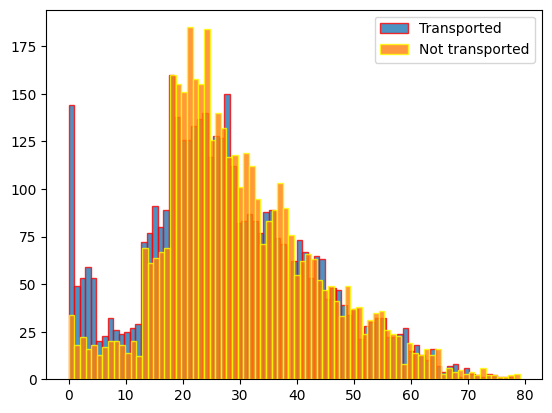

In [19]:
# Visualize Age variable and its relation with the target
AgeY = train_data["Age"].loc[train_data["Transported"]==True]
AgeN = train_data["Age"].loc[train_data["Transported"]==False]

plt.hist(AgeY, label='Transported', bins=80, alpha=0.8, edgecolor='red')
plt.hist(AgeN, label="Not transported", bins=80, alpha=0.8, edgecolor='yellow')
plt.legend()
plt.show()

The most noticable part is probably that ~80% of the 0-aged samples are transported. Meaning this attribute should be exploited, therefore I will also create a separate binary feature for it called 'Zero_aged'.

We can also say that under year 18 there are more Transported person and between 18-27 yrs there are less. In other cases it is fairly distributed. (Note that the tartget is also in fair ratio so it is representative)
So, based on this I will create 4 classes for the 'Age_group' the following way:

In [20]:
train_data['Zero_aged'] = train_data.apply(lambda x: 1 if x['Age']<1 else 0, axis=1)
train_data['Age_group'] = pd.cut(x=train_data['Age'], bins=[-1,0,18,27,82], labels=[1,2,3,4])
all_data['Zero_aged'] = all_data.apply(lambda x: 1 if x['Age']<1 else 0, axis=1)
all_data['Age_group'] = pd.cut(x=all_data['Age'], bins=[-1,0,18,27,82], labels=[1,2,3,4])

In [21]:
# We can also check the frequency of certain values in the groups
# Its a bit strange that so little difference between g3 and g4 knowing their intervals
print(all_data["Age_group"].value_counts())

Age_group
4    6023
3    3917
2    2500
1     260
Name: count, dtype: int64


### Family_Size feature

This one also taken from the mentioned nb. Another great idea is to create a grouped feature from the names. It is very well processed in the source nb, for now I will simplify it.

In [22]:
# Replace NaN's with outliers for now (so we can split feature)
train_data['Name'].fillna('Unknown Unknown', inplace=True)
all_data['Name'].fillna('Unknown Unknown', inplace=True)

# New feature - Surname
train_data['Surname']=train_data['Name'].str.split().str[-1]
all_data['Surname']=all_data['Name'].str.split().str[-1]

# New feature - Family size
train_data['Family_size']=train_data['Surname'].apply(lambda x: train_data['Surname'].value_counts()[x])
all_data['Family_size']=all_data['Surname'].apply(lambda x: all_data['Surname'].value_counts()[x])

# Say unknown surname means no family
train_data.loc[train_data['Family_size']>100,'Family_size']=0
all_data.loc[all_data['Family_size']>100,'Family_size']=0

# Drop name (we don't need it anymore)
train_data.drop(columns=['Name','Surname'], axis=1, inplace=True)
all_data.drop(columns=['Name','Surname'], axis=1, inplace=True)

# Analysis of feature connections (and missing value replacement)

### Cat features & Target relationships

First lets take a look at the categorical feature's relationship with the target. This will be useful to identify connections for a later created "Potencial" feature.

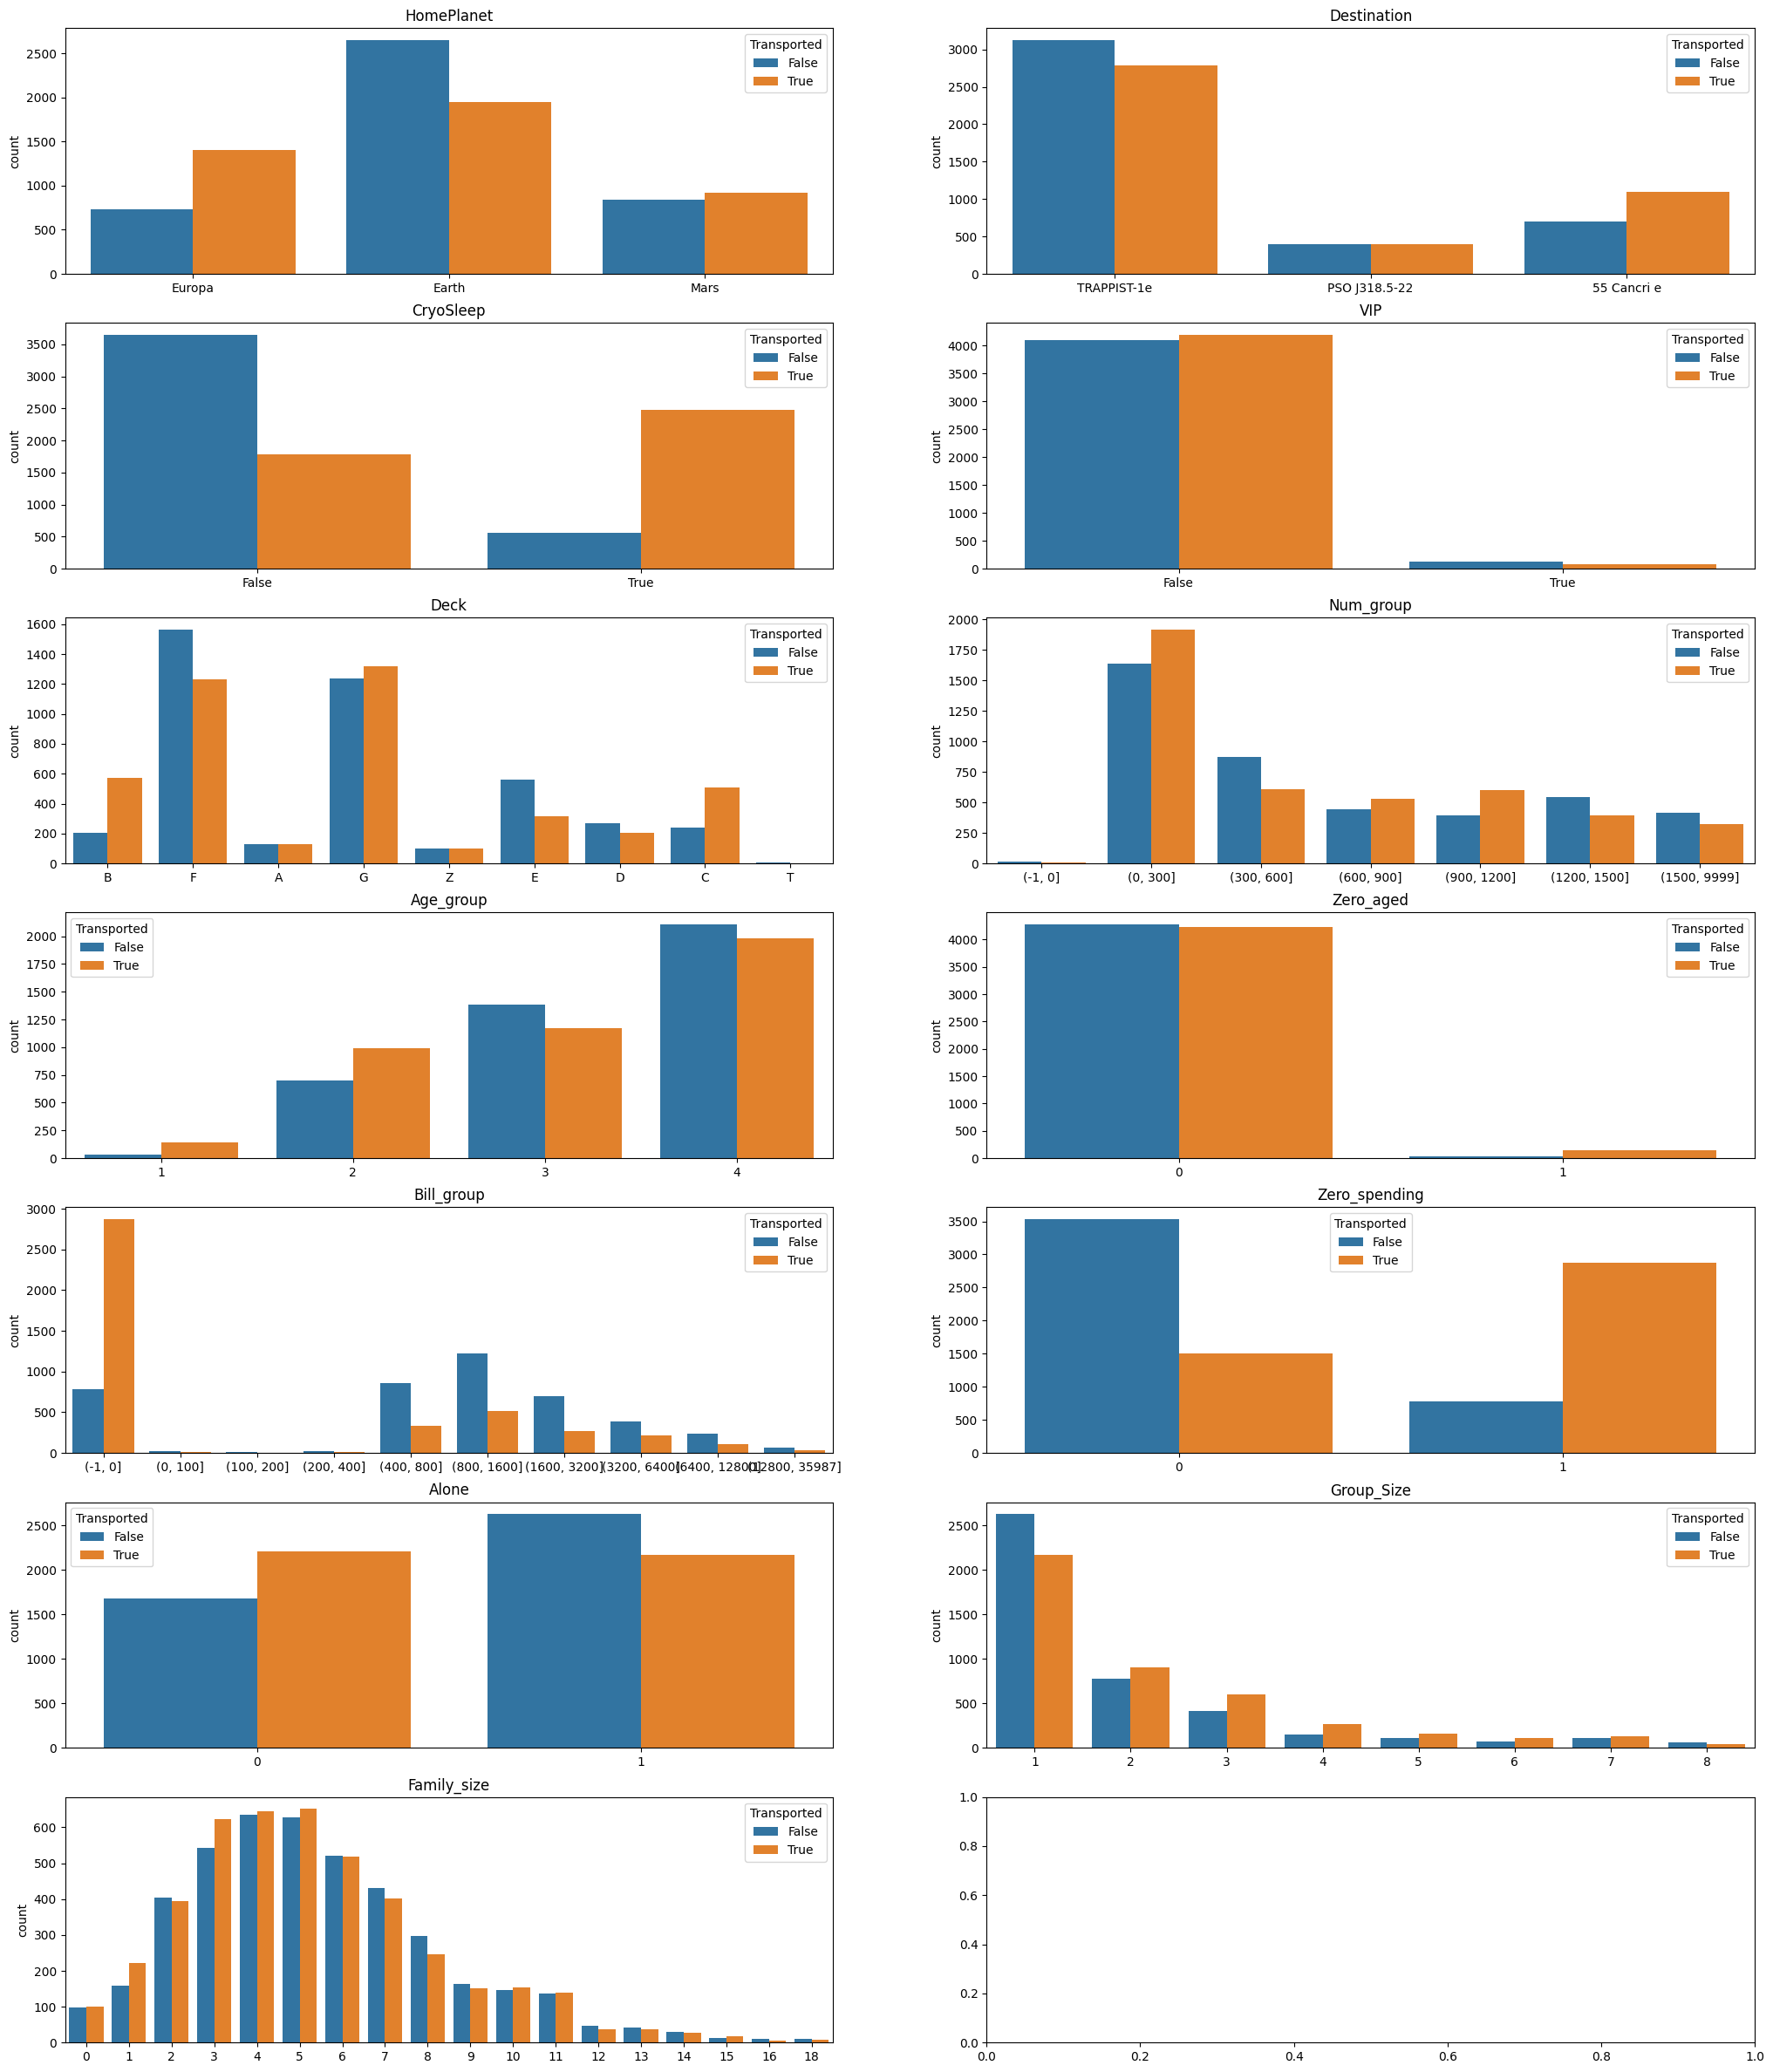

In [23]:
fig, axs = plt.subplots(7, 2, figsize=(25, 30))
axs = axs.flatten()

feats = ["HomePlanet","Destination", "CryoSleep", "VIP", "Deck", "Num_group", "Age_group", "Zero_aged",
         "Bill_group", "Zero_spending", "Alone", "Group_Size", "Family_size"]

for i, col in enumerate(feats):
    sns.countplot(data=train_data, x=col, hue="Transported", ax=axs[i])
    axs[i].set_title(f"{col}")
    axs[i].set(xlabel=None)
    axs[i].legend(title="Transported")

plt.show()

Looks like 3 feature has strong relation with the target:
- It is very telling in the CryoSleep that most of those were in CryoSleep also got Transported.
- We can also see that Deck B and C has more True than False
- From Bill_group we can see that a high proportion is transported who did not pay for anything. That looks very important!


### Feature & Feature relationships

Although, in order to replace missing values effectively in train/test, we should rely on feature to feature relationships other than the connection with the target (because we dont have the target for the test set). So I will explore these connections in the following steps.

### Correlation heatmap

In [24]:
# Preprocessing for correlation visualization
try_df = train_data.copy()
try_numcols = try_df[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]]
try_oh_cols = ['HomePlanet','Destination','Deck','Age_group','Bill_group','Num_group','Side',]
try_df_oh = pd.get_dummies(try_df[try_oh_cols], dtype=int)

concat_list = [
               try_df["Transported"],
               try_df["Group_Size"], try_df["Family_size"], try_df["Group_Id"],
               try_df["Alone"], try_df["CryoSleep"],try_df["VIP"],
               try_df_oh, try_numcols,
              ]

try_df_2 = pd.concat(concat_list, axis=1)

<Axes: >

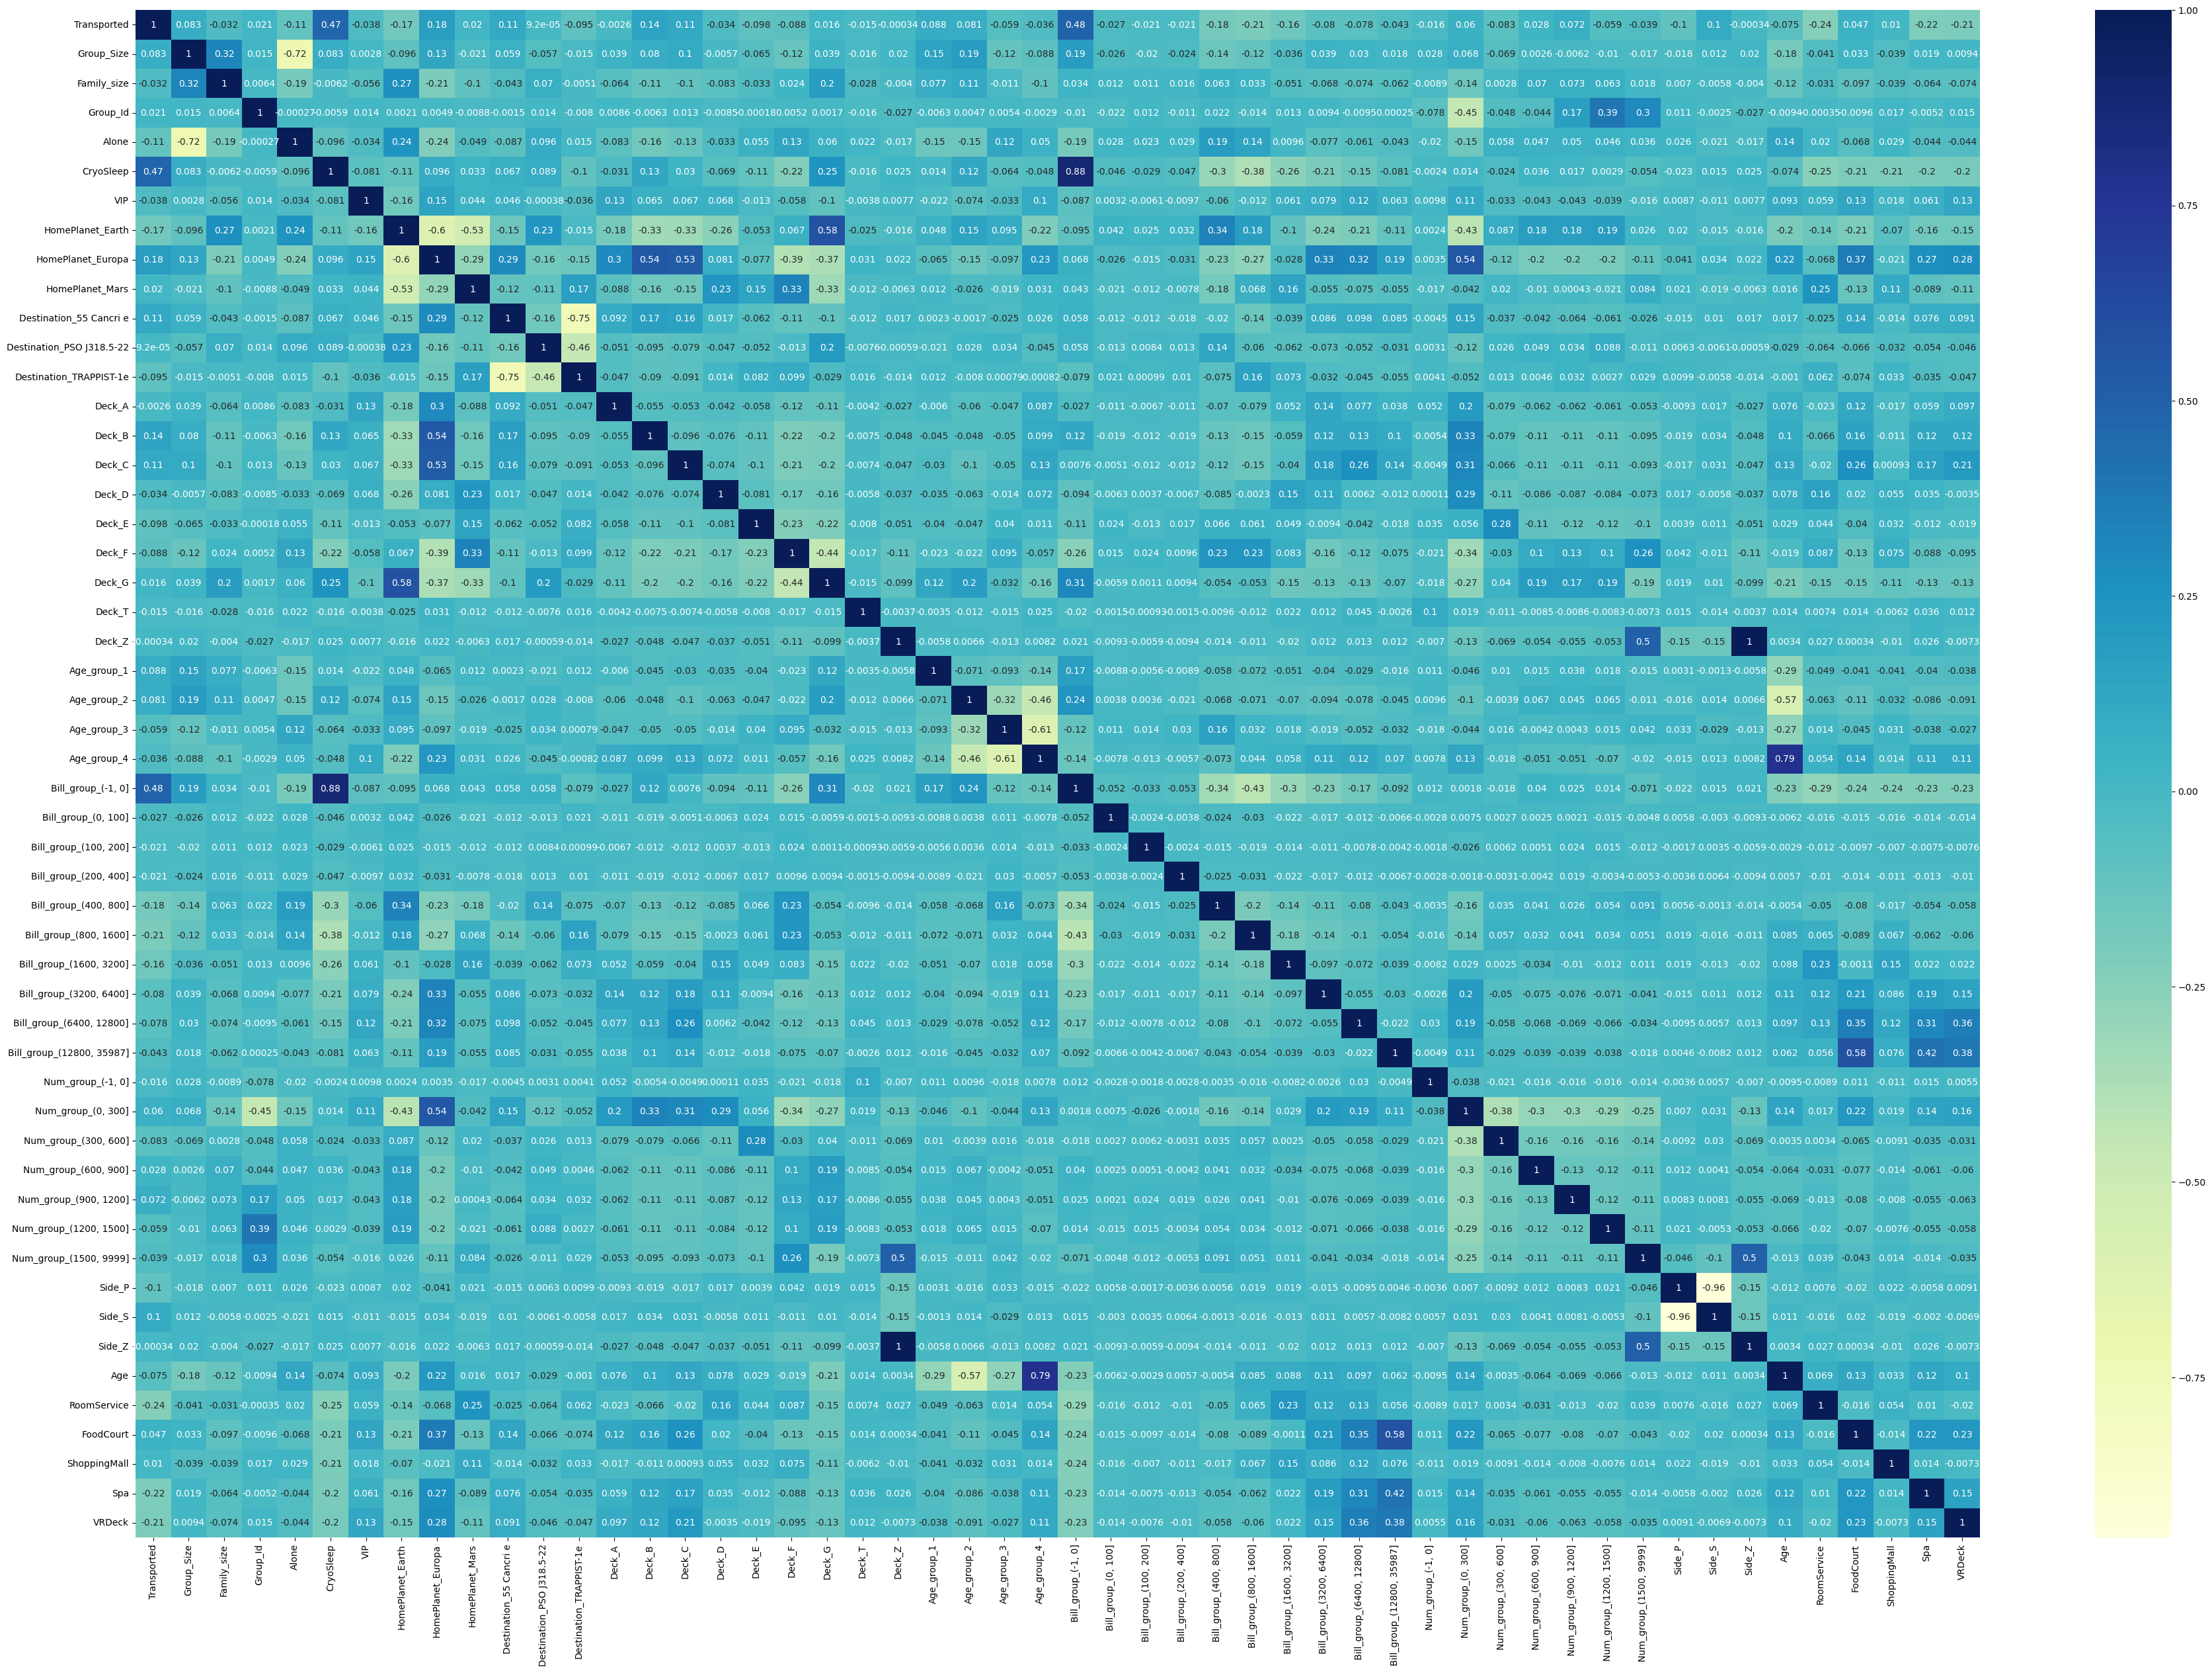

In [25]:
# Plot correlation coefficients of features
fig, ax = plt.subplots(figsize=(45,30))
fig = sns.heatmap(try_df_2.corr(), cmap="YlGnBu", annot=True, ax=ax)
fig

#### Observation

- Features like Deck_T(too few sample), Deck_Z(nan), Side, Bill_group_2-3-4 have very weak correlation with almost everyone
- Some relatively strong linear correlation:
    - Family_Size & HomePlanet categs
    - HomePlanet Europa & Deck_B,C
    - HomePlanet Earth & Deck_G
    - Bill_group_1 & CryoSleep
    - FoodCourt & last Bill_group

### Relationships based on barplots

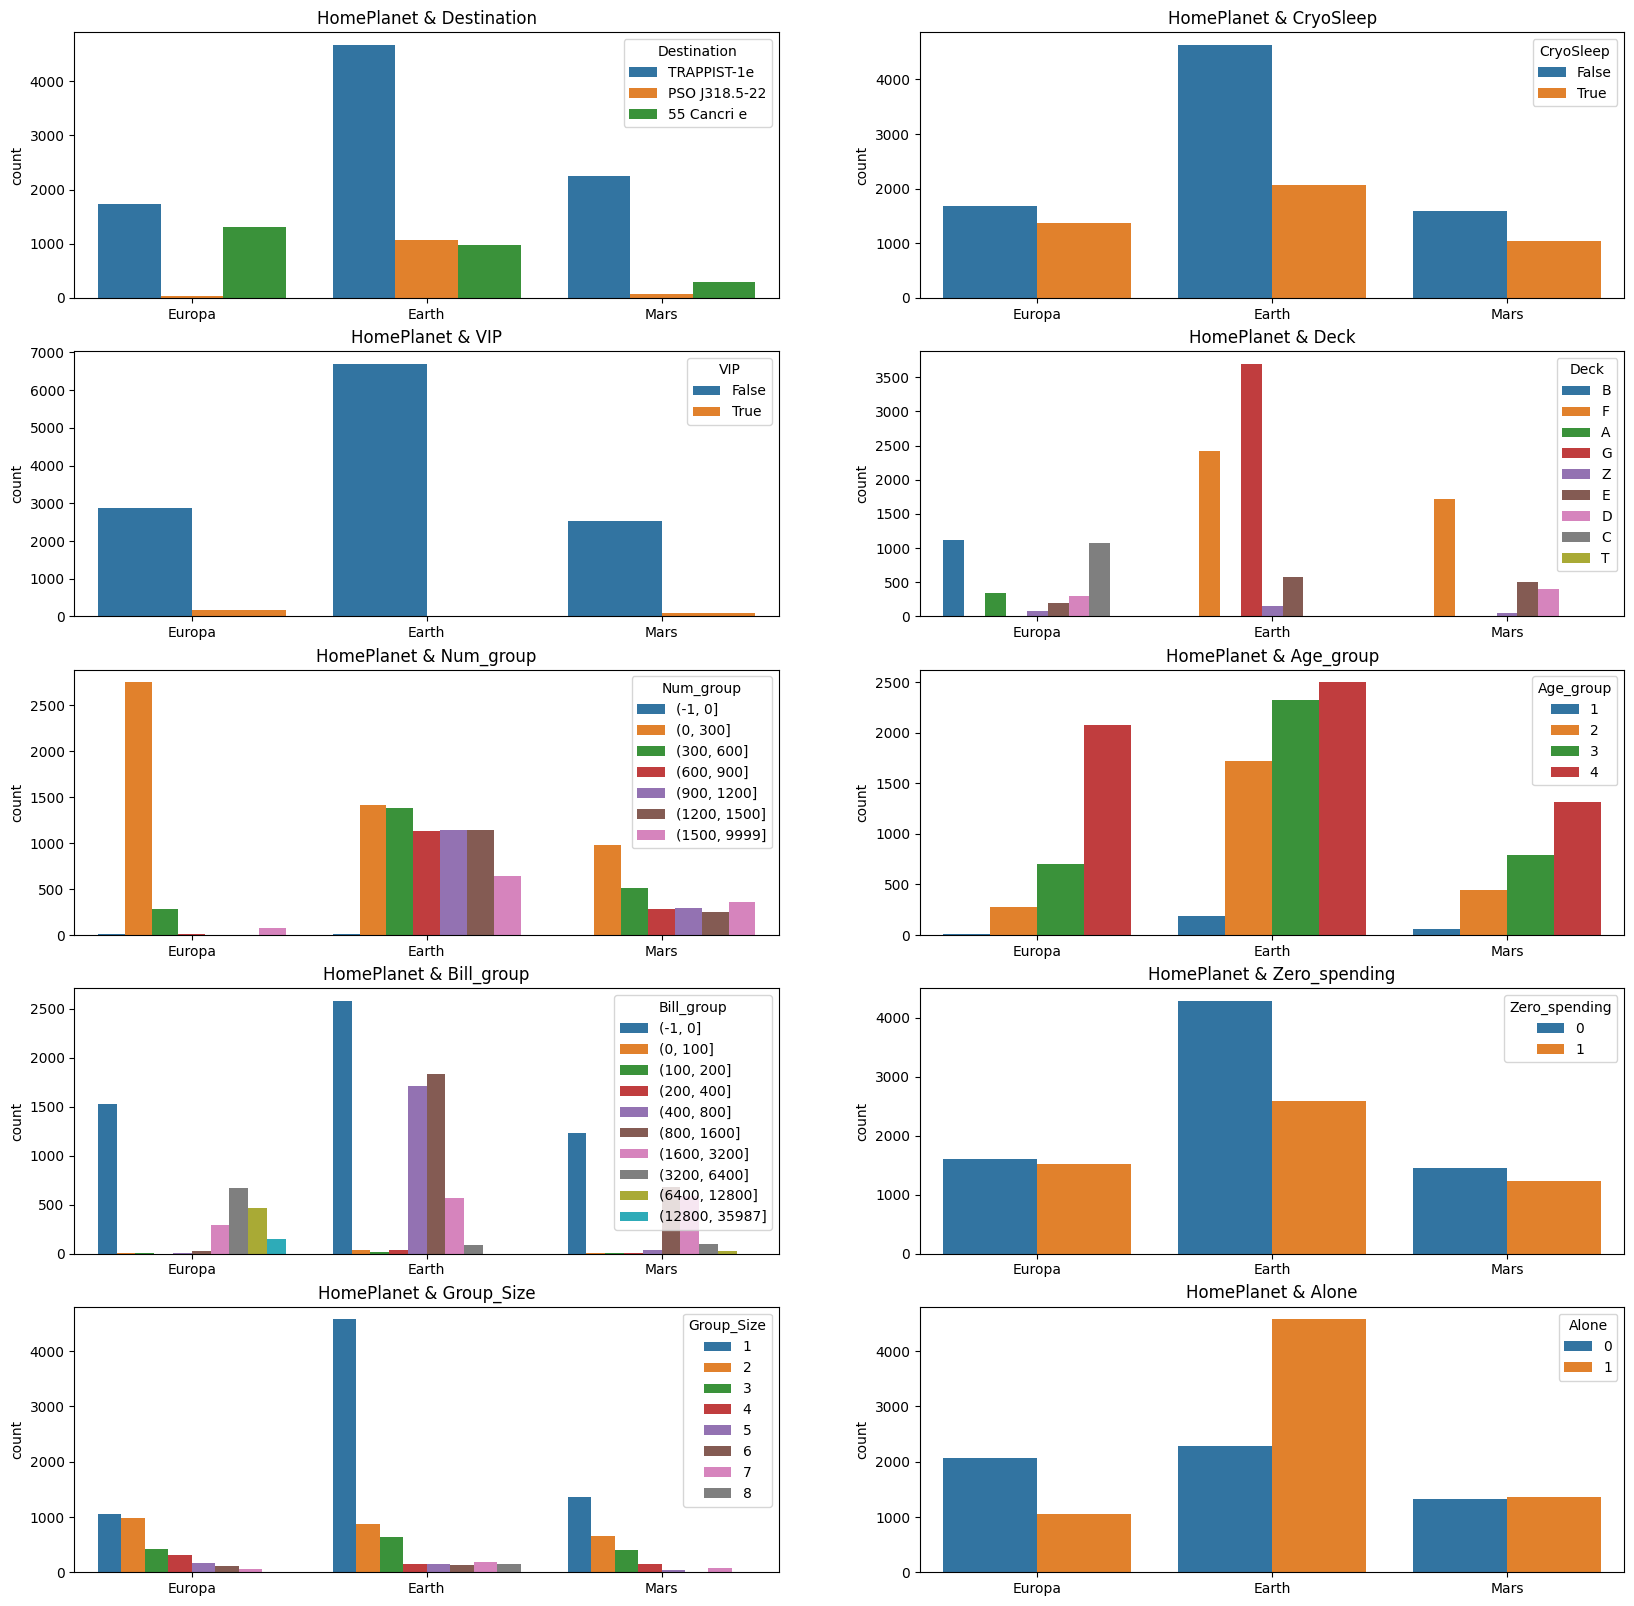

In [26]:
# Relation of Home_planet and others
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()

feats = ["Destination", "CryoSleep", "VIP", "Deck", "Num_group", "Age_group",  
         "Bill_group", "Zero_spending", "Group_Size", "Alone"]

for i, col in enumerate(feats):
    sns.countplot(data=all_data, x="HomePlanet", hue=col, ax=axs[i])
    axs[i].set_title(f"HomePlanet & {col}")
    axs[i].set(xlabel=None)
    axs[i].legend(title=col)

plt.show()

#### Observations
- HomePlanet & Destination: It looks like almost everyone who goes to PSO J318.5-22 are coming from Earth, so those NaNs can be replaced accordingly. Looks like a strong rule!


- HomePlanet & CryoSleep: It is fairly balanced except that there are less people transported from Earth.


- HomePlanet & VIP: There is no True value for Earth, but there is no strong rule to make.


- HomePlanet & Deck: This one looks very good in case of A,B,C,T and G. NaNs from HomePlanet can be replaced for:
    - A, B, C, T decks as Europa
    - G deck as Earth
    - for F, D we can still make some rule for random replacement, but that is risky
    

- HomePlanet & Num_group_temp: For this feature we can see one thing for sure, that the class for categories above the 600-900 category have something like a 70-30% ratio for Earth-Mars. But it is a weak rule to make.


- HomePlanet & Age_group: In this case no regularity can be stated.


- HomePlanet & Group_Size: There is a high ratio from Group 1 that is coming from Earth. 


- HomePlanet & Bill_group_temp: This relationship is a little bit better. We can see that people from different HomePlanet have very different spending behavior.
    - For categ (0, 100],(100, 200],(200, 400],(400, 800], almost everyone coming from Earth (except a low amount from Mars)
    - For categ (800, 1600], 60-40 ratio for Earth-Mars  (that is a weak rule, so wont be applied)
    - For categ (3200, 6400],(6400, 12800],(12800, 35987], almost everyone from Europa


In [27]:
print("Before HomePlanet replace: ", all_data["HomePlanet"].isna().sum())

# Replace with HomePlanet & Deck comparision
all_data.loc[(all_data["HomePlanet"].isna()) & (all_data["Deck"]=="G"), "HomePlanet"] = "Earth"
all_data.loc[(all_data["HomePlanet"].isna()) & (all_data["Deck"].isin(["A","B","C","T"])), "HomePlanet"] = "Europa"
print("After HomePlanet & Deck replace: ", all_data["HomePlanet"].isna().sum())

# Replace with HomePlanet & Destination comparision
all_data.loc[(all_data["HomePlanet"].isna()) & (all_data["Destination"]=="PSO J318.5-22"), "HomePlanet"] = "Earth"
print("After HomePlanet & Destination replace: ", all_data["HomePlanet"].isna().sum())

# Replace with HomePlanet & Bill_group comparision
all_data.loc[(all_data["HomePlanet"].isna()) & (all_data["Bill_group"].isin(["(0, 100]","(100, 200]","(200, 400]","(400, 800]"])), "HomePlanet"] = "Earth"
all_data.loc[(all_data["HomePlanet"].isna()) & (all_data["Bill_group"].isin(["(3200, 6400]","(6400, 12800]","(12800, 35987]",])), "HomePlanet"] = "Europa"
print("After HomePlanet & Bill_group replace: ", all_data["HomePlanet"].isna().sum())

# Replace with HomePlanet & Group_Size comparision
all_data.loc[(all_data["HomePlanet"].isna()) & (all_data["Group_Size"]==1), "HomePlanet"] = "Earth"
print("After HomePlanet & Group_Size replace: ", all_data["HomePlanet"].isna().sum())

# Fill the rest with mode
all_data["HomePlanet"].fillna(all_data["HomePlanet"].mode()[0], inplace=True)
print("After HomePlanet mode replace: ", all_data["HomePlanet"].isna().sum()) 

Before HomePlanet replace:  288
After HomePlanet & Deck replace:  160
After HomePlanet & Destination replace:  150
After HomePlanet & Bill_group replace:  150
After HomePlanet & Group_Size replace:  64
After HomePlanet mode replace:  0


In [28]:
# HomePlanet mode is Earth so the rest will be that
HPmode = all_data.groupby("HomePlanet")["HomePlanet"].size()
HPmode

HomePlanet
Earth     7106
Europa    3180
Mars      2684
Name: HomePlanet, dtype: int64

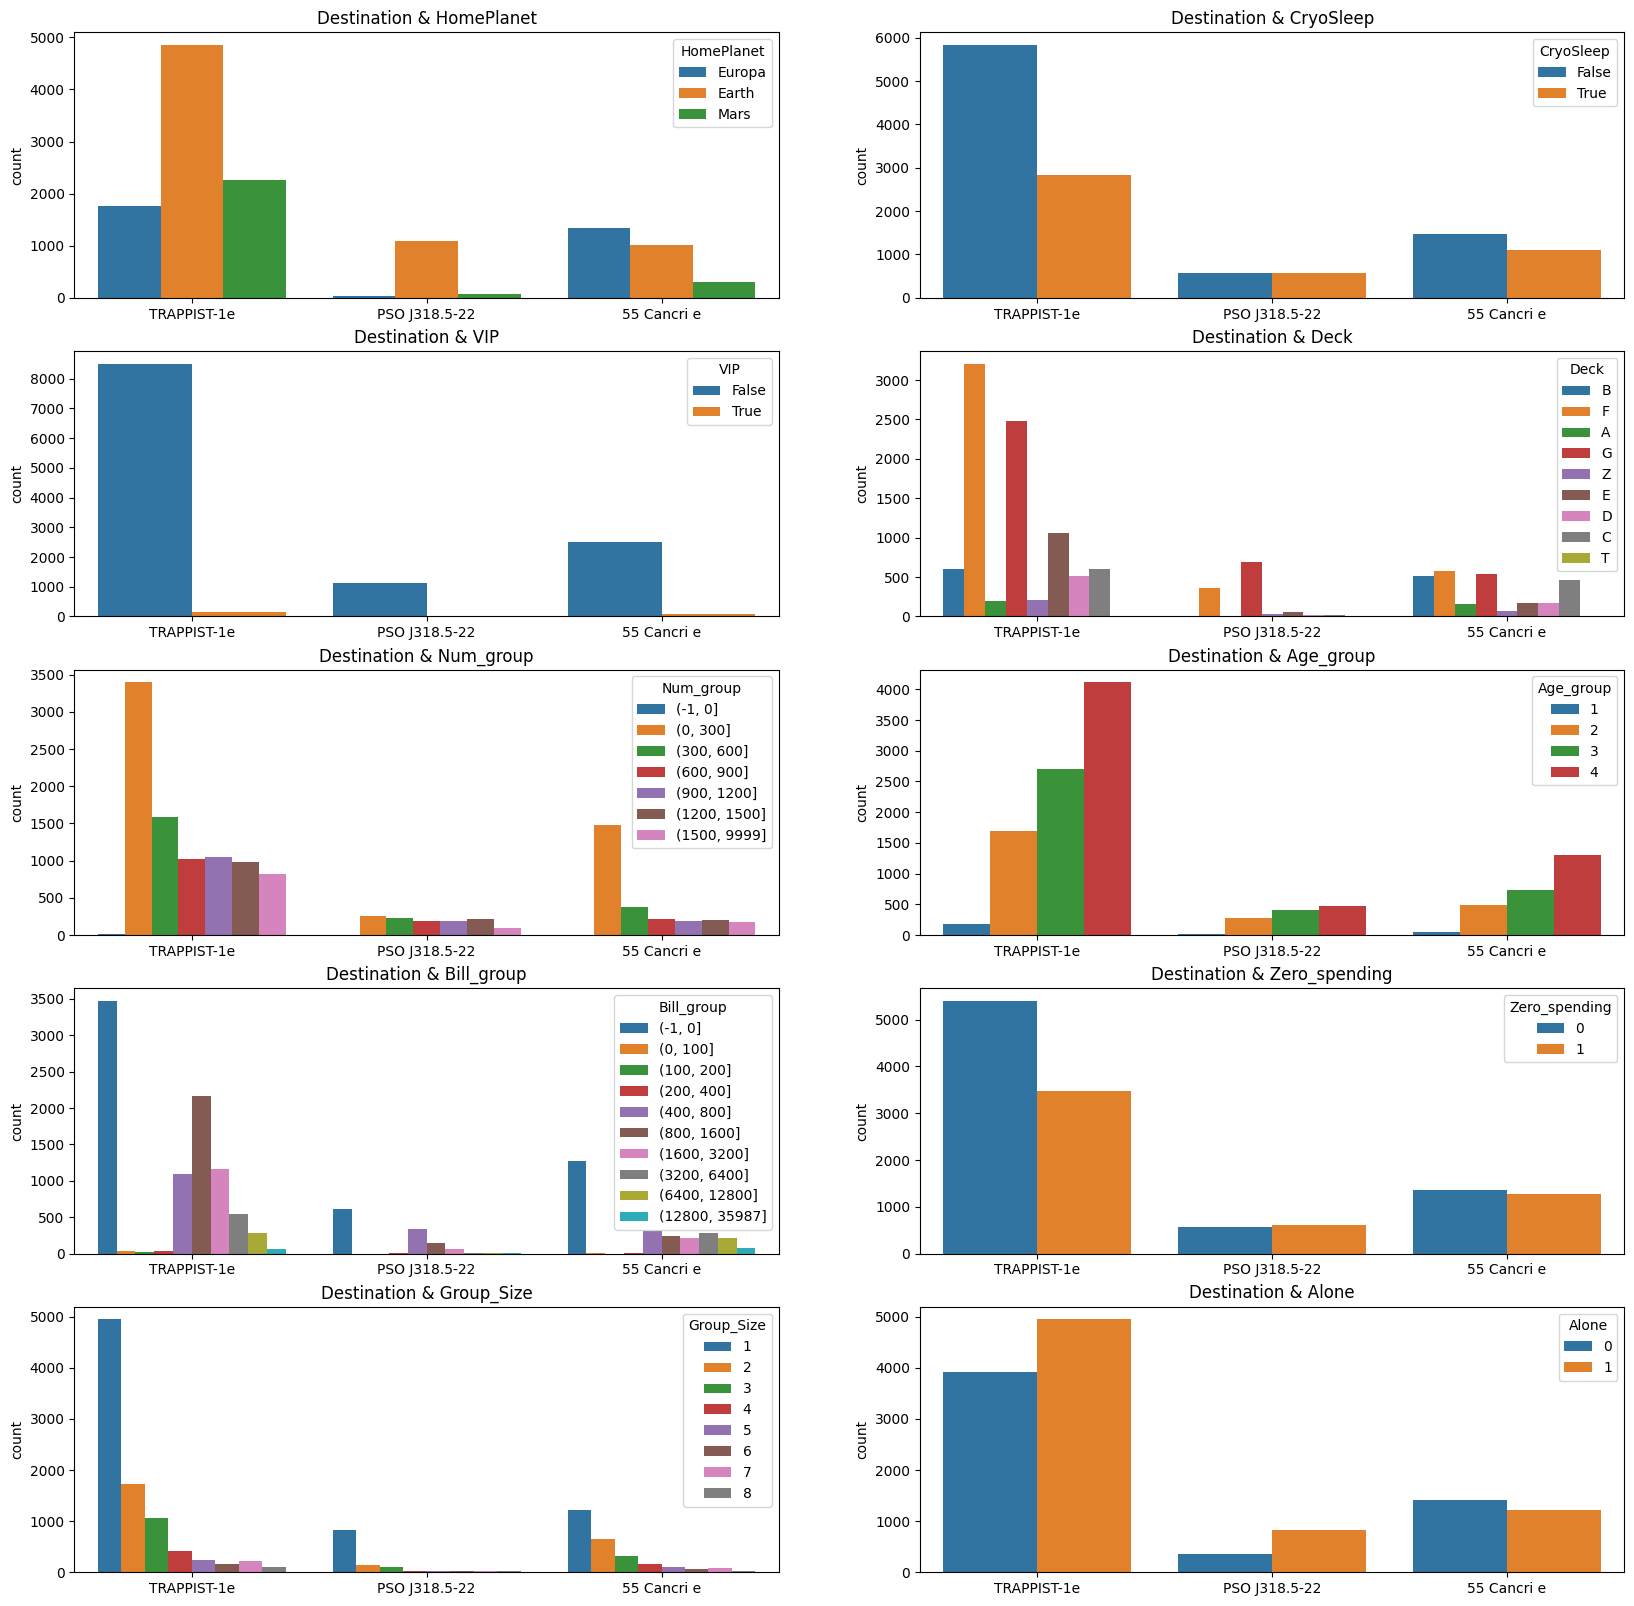

In [29]:
# Relation of Destination and others
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()

feats = ["HomePlanet", "CryoSleep", "VIP", "Deck", "Num_group", "Age_group",  
         "Bill_group", "Zero_spending", "Group_Size", "Alone"]

for i, col in enumerate(feats):
    sns.countplot(data=all_data, x="Destination", hue=col, ax=axs[i])
    axs[i].set_title(f"Destination & {col}")
    axs[i].set(xlabel=None)
    axs[i].legend(title=col)

plt.show()

#### Observations

- Destination & HomePlanet:
    - One rule can be considered relatively good: If HomePlanet==Mars, we can take TRAPPIST for its majority
    - For HomePlanet==Europa It is 50-50 TRAPPIST or 55 Cancri
    - For HomePlanet==Earth It is 60-20-20 with the majority of TRAPPIST so these are weaker rules

    
- Destination & CryoSleep: We cannot really say anything for sure. But if no other choice then:
    - If CryoSleep==False: TRAPPIST for its majority ~70% ?


- Destination & VIP: Same as before, nothing decisive.


- Destination & Deck: Nothing to consider again.
    - E, F, G, D: can be any of them, but TRAPPIST-1e has a higher chance
    - A, B, C: They are 50-50 in either TRAPPIST-1e or 55 Cancri e
    - T: too few samples


- Destination & Age_group: For every age group there are around 3x more who belongs to TRAPPIST-1e, but nothing can be taken granted.


- Destination & Num_group_temp: Same observation as in Destination & Age_group case.


- Destination & Bill_group_temp: TRAPPIST majority is significant in class 800-1600 and in 0 spending.


- Destination & Group_Size: There are a lot of samples from Group 1 who goes to TRAPPIST-1e.


In [30]:
# And if we checkout the class ratio we can see that there are a lot more from TRAPPIST
# So we can take it if the rules are not working
DESmode = all_data.groupby("Destination")["Destination"].size()
DESmode

Destination
55 Cancri e      2641
PSO J318.5-22    1184
TRAPPIST-1e      8871
Name: Destination, dtype: int64

In [31]:
# print("Before Destination replace: ", all_data["Destination"].isna().sum())

# # Replace with Destination & HomePlanet comparision
# all_data.loc[(all_data["Destination"].isna()) & (all_data["HomePlanet"]=="Mars"), "Destination"] = "TRAPPIST-1e"

# # eu_condition = (all_data["Destination"].isna()) & (all_data["HomePlanet"]=="Europa")
# # eu_random_values = np.random.choice(["TRAPPIST-1e","55 Cancri e"], size=sum(eu_condition), p=[0.5,0.5])
# # all_data.loc[eu_condition, "Destination"] = eu_random_values

# # ea_condition = (all_data["Destination"].isna()) & (all_data["HomePlanet"]=="Earth")
# # ea_random_values = np.random.choice(["TRAPPIST-1e","PSO J318.5-22","55 Cancri e"], size=sum(ea_condition), p=[0.6,0.2,0.2])
# # all_data.loc[ea_condition, "Destination"] = ea_random_values
# print("After Destination & HomePlanet replace: ", all_data["Destination"].isna().sum())


# # Replace Destination & CryoSleep comparision
# Cryo_condition = (all_data["Destination"].isna()) & (all_data["CryoSleep"].isin([False,True]))
# Cryo_random_values = np.random.choice(["TRAPPIST-1e","55 Cancri e","PSO J318.5-22"], size=sum(Cryo_condition), p=[0.6,0.25,0.15])
# all_data.loc[Cryo_condition, "Destination"] = Cryo_random_values
# print("After Destination & CryoSleep replace: ", all_data["Destination"].isna().sum())


# # Replace Destination & Deck comparision
# ED_condition = (all_data["Destination"].isna()) & (all_data["Deck"].isin(["E","D"]))
# ED_random_values = np.random.choice(["TRAPPIST-1e","55 Cancri e"], size=sum(ED_condition), p=[0.7,0.3])
# all_data.loc[ED_condition, "Destination"] = ED_random_values

# FG_condition = (all_data["Destination"].isna()) & (all_data["Deck"].isin(["F","G"]))
# FG_random_values = np.random.choice(["TRAPPIST-1e","55 Cancri e","PSO J318.5-22"], size=sum(FG_condition), p=[0.6,0.2,0.2])
# all_data.loc[FG_condition, "Destination"] = FG_random_values
# print("After Destination & Deck replace: ", all_data["Destination"].isna().sum())


# # # Replace Destination & Age_group comparision
# # age_gr_condition = (all_data["Destination"].isna()) & (all_data["Age_group"].isin(["0-18","18-27","27-81"]))
# # age_gr_random_values = np.random.choice(["TRAPPIST-1e","55 Cancri e","PSO J318.5-22"], size=sum(age_gr_condition), p=[0.6,0.25,0.15])
# # all_data.loc[age_gr_condition, "Destination"] = age_gr_random_values
# # print("After Destination & Age_group replace: ", all_data["Destination"].isna().sum())

# Since it is very hard to make decesions I will take TRAPPIST-1e for all 274 missing values
all_data["Destination"].fillna(all_data["Destination"].mode()[0], inplace=True)
print("After Destination mode replace: ", all_data["Destination"].isna().sum()) 

After Destination mode replace:  0


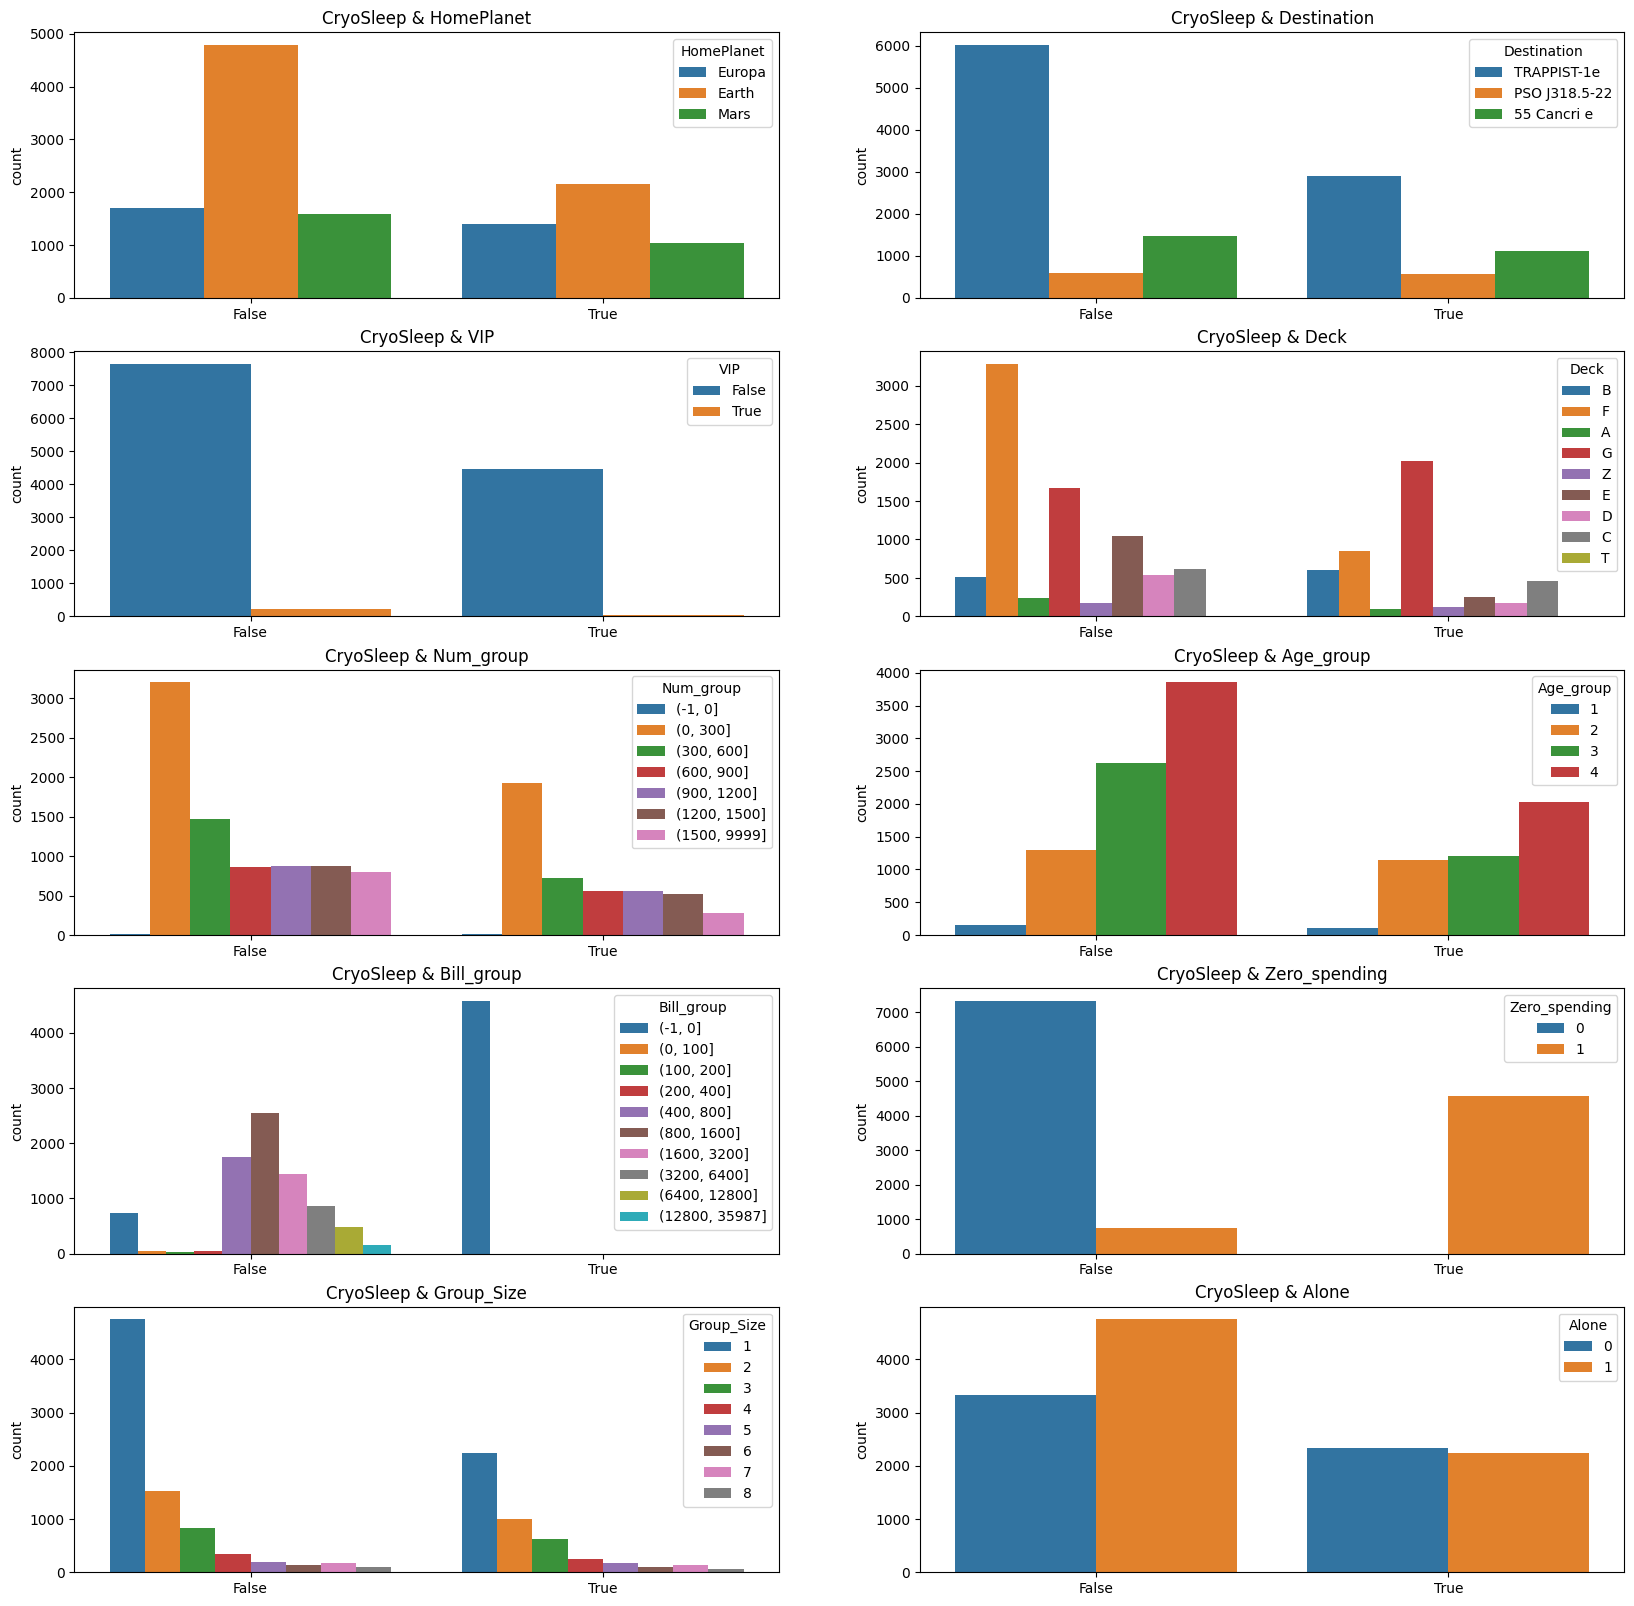

In [32]:
# Relation of CryoSleep and others
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()

feats = ["HomePlanet", "Destination", "VIP", "Deck", "Num_group", "Age_group",  
         "Bill_group", "Zero_spending", "Group_Size", "Alone"]

for i, col in enumerate(feats):
    sns.countplot(data=all_data, x="CryoSleep", hue=col, ax=axs[i])
    axs[i].set_title(f"CryoSleep & {col}")
    axs[i].set(xlabel=None)
    axs[i].legend(title=col)

plt.show()

#### Observations

Well it is very balanced, but I can make some assumptions:
- The best relationship is with the Bill_group_temp feature:
    - This shows that those who were in CryoSleep didnt spent any money, so they can be assigned as True
    
    
- CryoSleep is False in ~70% if HomePlanet is Earth
- CryoSleep is False in ~70% if Destination is TRAPPIST-1e
- CryoSleep is False in ~70% if Deck is F or E
- There are more lonely passenger who did not used cryo.

In [33]:
# Cryo class ratio
CRmode = all_data.groupby("CryoSleep")["CryoSleep"].size()
CRmode

CryoSleep
False    8079
True     4581
Name: CryoSleep, dtype: int64

In [34]:
print("Before CryoSleep replace: ", all_data["CryoSleep"].isna().sum())

# Replace CryoSleep & Bill_group comparision
#all_data.loc[(all_data["CryoSleep"].isna()) & (all_data["Bill_group"]=="(-1, 0]"), "CryoSleep"] = True
all_data.loc[all_data["Zero_spending"] == 0, "CryoSleep"] = True # for some reason the one above not working
print("After CryoSleep & Bill_group replace: ", all_data["CryoSleep"].isna().sum())

# These below are not too decisive
deck_condition = (all_data["CryoSleep"].isna()) & (all_data["Deck"].isin(["E","F"]))
deck_random_values = np.random.choice([False,True], size=sum(deck_condition), p=[0.7,0.3])
all_data.loc[deck_condition, "CryoSleep"] = deck_random_values
print("After CryoSleep & Deck replace: ", all_data["CryoSleep"].isna().sum())

home_condition = (all_data["CryoSleep"].isna()) & (all_data["HomePlanet"]=="Earth")
home_random_values = np.random.choice([False,True], size=sum(home_condition), p=[0.7,0.3])
all_data.loc[home_condition, "CryoSleep"] = home_random_values
print("After CryoSleep & HomePlanet replace: ", all_data["CryoSleep"].isna().sum())

dest_condition = (all_data["CryoSleep"].isna()) & (all_data["Destination"]=="TRAPPIST-1e")
dest_random_values = np.random.choice([False,True], size=sum(dest_condition), p=[0.7,0.3])
all_data.loc[dest_condition, "CryoSleep"] = dest_random_values
print("After CryoSleep & Destination replace: ", all_data["CryoSleep"].isna().sum())

# Fill rest with False
all_data["CryoSleep"].fillna(False, inplace=True)
print("CryoSleep rest replace: ", all_data["CryoSleep"].isna().sum())

Before CryoSleep replace:  310
After CryoSleep & Bill_group replace:  136
After CryoSleep & Deck replace:  100
After CryoSleep & HomePlanet replace:  37
After CryoSleep & Destination replace:  13
CryoSleep rest replace:  0


Well that wasn't too accurate, but I didn't find a better option. Maybe taking all missing as False would give better results.

In [35]:
# The VIP feature is very unbalanced, and therefore I will simply replace nans with False
all_data["VIP"].value_counts()

VIP
False    12401
True       273
Name: count, dtype: int64

In [36]:
all_data["VIP"].fillna(False, inplace=True)

#### Replacing NaNs in the numerical features
For these features I will simply assign the median value, which is 0 for every service feature.

In [37]:
numericals = ["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
for col in numericals:
    all_data[col].fillna((all_data[col].median()), inplace=True)

### Cabin missing values

This approach was very clever, and I took it from this nb: https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide#Feature-engineering

In [38]:
# # Scatterplot
# plt.figure(figsize=(10,4))
# sns.scatterplot(x=all_data['Num'], y=all_data['Group_Id'], c=LabelEncoder().fit_transform(all_data.loc[~all_data['Num'].isna(),'Deck']), cmap='tab10')
# plt.title('Num vs Group_Id coloured by group')

In [39]:
# # Missing values before
# CN_bef=all_data['Num'].isna().sum()

# # Extrapolate linear relationship on a deck by deck basis
# for deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
#     # Features and labels
#     X_CN = all_data.loc[~(all_data['Num'].isna()) & (all_data['Deck'] == deck), 'Group_Id']
#     y_CN = all_data.loc[~(all_data['Num'].isna()) & (all_data['Deck'] == deck), 'Num']
#     X_test_CN = all_data.loc[(all_data['Num'].isna()) & (all_data['Deck'] == deck), 'Group_Id']

#     print(f"Deck {deck}:")
#     print("X_CN shape:", X_CN.shape)
#     print("y_CN shape:", y_CN.shape)
#     print("X_test_CN shape:", X_test_CN.shape)

#     # Linear regression
#     if X_CN.shape[0] > 0 and X_test_CN.shape[0] > 0:  # Check if there are samples for this deck
#         model_CN = LinearRegression()
#         model_CN.fit(X_CN.values.reshape(-1, 1), y_CN)
#         preds_CN = model_CN.predict(X_test_CN.values.reshape(-1, 1))

#         # Fill missing values with predictions
#         all_data.loc[(all_data['Num'].isna()) & (all_data['Deck'] == deck), 'Num'] = preds_CN.astype(int)

# # Print number of missing values left
# print('#Num missing values before:', CN_bef)
# print('#Num missing values after:', all_data['Num'].isna().sum())

In [40]:
# all_data.drop(
#     columns=["Name","Deck_temp","Num_temp","Num_group_temp","Age_group_temp","Bill_temp","Bill_group_temp"],
#     axis=1,
#     inplace=True,
# )

# Removing outliers

In [41]:
# There are some outliers in the "service" features
# So we have to deal with these for better modelling results
all_data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].describe()

RoomService     FoodCourt  ShoppingMall           Spa        VRDeck
count  12970.000000  12970.000000  12970.000000  12970.000000  12970.000000
mean     218.378026    441.890979    170.779491    301.722282    300.450270
std      641.766201   1568.038076    584.153630   1118.746785   1168.655639
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000
75%       42.750000     62.750000     23.000000     50.000000     36.000000
max    14327.000000  29813.000000  23492.000000  22408.000000  24133.000000

In [42]:
# Logic for removing outliers is,
# that we determine 2 threshold value
# 1. mean+4*std 2. mean+5*std
# and replace with a random in that interval

def calc_outlrs(df, colnames=list):
    df = df.copy()
    trshld_1 = [4*int(df[i].std()) + int(df[i].mean()) for i in colnames]
    trshld_2 = [5*int(df[i].std()) + int(df[i].mean()) for i in colnames]
    maxv = [int(df[i].max()) for i in colnames]  

    for i, col in enumerate(colnames):
        condition = (df[col]>trshld_1[i])
        random_values = np.random.randint(trshld_1[i], trshld_2[i], size=sum(condition))
        df.loc[(df[col]>trshld_1[i]), col] = random_values
                
    return df, trshld_1,trshld_2, maxv


In [43]:
colnames = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
train_data, _,_,_ = calc_outlrs(train_data, colnames=colnames)
all_data, trshld_1, trshld_2, maxv = calc_outlrs(all_data, colnames=colnames)

print(f"""
RoomService's trshld_1: {trshld_1[0]}, trshld_2: {trshld_2[0]}, maxval: {maxv[0]}
FoodCourt's trshld_1: {trshld_1[1]}, trshld_2: {trshld_2[1]}, maxval: {maxv[1]}
ShoppingMall's trshld_1: {trshld_1[2]}, trshld_2: {trshld_2[2]}, maxval: {maxv[2]}
Spa's trshld_1: {trshld_1[3]}, trshld_2: {trshld_2[3]}, maxval: {maxv[3]}
VRDeck's trshld_1: {trshld_1[4]}, trshld_2: {trshld_2[4]}, maxval: {maxv[4]}
""")


RoomService's trshld_1: 2782, trshld_2: 3423, maxval: 14327
FoodCourt's trshld_1: 6713, trshld_2: 8281, maxval: 29813
ShoppingMall's trshld_1: 2506, trshld_2: 3090, maxval: 23492
Spa's trshld_1: 4773, trshld_2: 5891, maxval: 22408
VRDeck's trshld_1: 4972, trshld_2: 6140, maxval: 24133



In [44]:
# Now the max values are all below 10k
all_data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].describe()

RoomService     FoodCourt  ShoppingMall           Spa        VRDeck
count  12970.000000  12970.000000  12970.000000  12970.000000  12970.000000
mean     203.847494    398.338242    156.394834    267.308712    262.500154
std      522.471038   1200.812513    425.117671    815.205238    828.596002
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000
75%       42.750000     62.750000     23.000000     50.000000     36.000000
max     3419.000000   8273.000000   3078.000000   5886.000000   6139.000000

# Feature engineering on clean data

Some of the custom made features needs to be updated by the changes. But e.g. Group_Id, Group_size, Alone are coming from PassengerId that didn't change at all (also Family_size, Num_group did not change), so they can stay as they are. Also there are feature I won't process further like: Num, Side.

Still I will recalculate Num_group, because XGBoost cannot interprete its labels containing ']' characters.

In [45]:
# Drop before recalc
all_data.drop(
    columns=["Age_group","Zero_aged","Bill","Bill_group","Zero_spending","Side","Deck_perc","Num_group"],
    axis=1,
    inplace=True
)

# Redefine Age_group
all_data['Age_group'] = pd.cut(x=all_data['Age'], bins=[-1,0,18,27,81], labels=[1,2,3,4])

# Redefine Zero_aged
all_data['Zero_aged'] = all_data.apply(lambda x: 1 if x['Age']<1 else 0, axis=1)

# Redefine Bill
colstosum = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
all_data["Bill"] = all_data[colstosum].agg("sum", axis=1)

# Redefine Bill_group
maxbill = int(all_data["Bill"].max())
bgbins = [-1,0,100,200,400,800,1600,3200,6400,12800,maxbill]
all_data["Bill_group"] = pd.cut(x=all_data["Bill"],bins=bgbins,labels=[1,2,3,4,5,6,7,8,9,10])

# Redefine Zero_spending
all_data["Zero_spending"] = all_data["Bill"].apply(lambda x: 1 if x==0.0 else 0)

# Redefine Deck_perc
decks = train_data.groupby("Deck")["Transported"].describe()
decks["Deck_perc"] = decks.apply(lambda x: (x["freq"]/x["count"])*100 if x["top"] else (x["count"] - x["freq"])/x["count"]*100, axis=1)
all_data = pd.merge(all_data, decks[["Deck_perc"]]/100, left_on="Deck", right_index=True, how="left")

####### NEW DECK_PERC ########
# # Redefine Deck_perc
# decks = train_data.groupby("Deck")["Transported"].describe()
# decks["Deck_perc_temp"] = decks.apply(lambda x: (x["freq"]/x["count"])*100 if x["top"] else (x["count"] - x["freq"])/x["count"]*100, axis=1)
# normalization_factor = decks['count'].sum() / decks['count']
# decks['Deck_perc'] = np.log((decks['Deck_perc_temp'] * normalization_factor).astype(int)) /10
# decks['Deck_perc'] = decks['Deck_perc'].apply(lambda x: x/10 if x>0.743 else x) # reduce T and Z weight or not?
# all_data = pd.merge(all_data, decks["Deck_perc"], left_on="Deck", right_index=True, how="left")

# Redefine Num_group
maxnum = all_data["Num"].max()
bins = [-1, 0, 300, 600, 900, 1200, 1500, maxnum]
all_data['Num_group'] = pd.cut(all_data['Num'], bins=bins, labels=[1,2,3,4,5,6,7])
all_data.drop("Num",axis=1,inplace=True)

In [46]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    12970 non-null  object  
 1   HomePlanet     12970 non-null  object  
 2   CryoSleep      12970 non-null  bool    
 3   Destination    12970 non-null  object  
 4   Age            12970 non-null  float64 
 5   VIP            12970 non-null  bool    
 6   RoomService    12970 non-null  float64 
 7   FoodCourt      12970 non-null  float64 
 8   ShoppingMall   12970 non-null  float64 
 9   Spa            12970 non-null  float64 
 10  VRDeck         12970 non-null  float64 
 11  Group_Id       12970 non-null  int64   
 12  Group_Size     12970 non-null  int64   
 13  Alone          12970 non-null  int64   
 14  Deck           12970 non-null  object  
 15  Family_size    12970 non-null  int64   
 16  Age_group      12970 non-null  category
 17  Zero_aged      12970 non-null  

### Binary indicators

In order to strengthen the importance of the 'service' features for the model, I create a binary indicator for them.

In [47]:
all_data["RS_ind"] = all_data["RoomService"].apply(lambda x: 0 if x == 0 else 1)
all_data["FC_ind"] = all_data["FoodCourt"].apply(lambda x: 0 if x == 0 else 1)
all_data["SM_ind"] = all_data["ShoppingMall"].apply(lambda x: 0 if x == 0 else 1)
all_data["SP_ind"] = all_data["Spa"].apply(lambda x: 0 if x == 0 else 1)
all_data["VR_ind"] = all_data["VRDeck"].apply(lambda x: 0 if x == 0 else 1)

### Extra "Potencial" feature

My idea is to create a potential indicator constructed from the combination of Age, Decks and CryoSleep as they seemed to be important variables.

In [48]:
# Experiment with the idea on a subset
trydf = all_data.loc[510:520, ["Age","Zero_aged","Age_group","CryoSleep","Zero_spending","Deck","Deck_perc"]].copy()

# So it turned out that many passenger were transported when they were in CryoSleep 
# it does not mean that we can be 100% sure in every case so I just apply a small weight
trydf["Cryo_weight"] = trydf.apply(lambda x: 0.25 if x["CryoSleep"] else 0.0, axis=1)
trydf["No_spen_weight"] = trydf.apply(lambda x: 0.25 if x["Zero_spending"] else 0.0, axis=1)

# Also we saw that the is a higher chance to get transported if you are in a certain age group
# so I give it a small weight
trydf["Age_weight"] = trydf["Age_group"].apply(lambda x: 0.25 if x in [1, 2] else (-0.15 if x == 3 else 0))

trydf["Deck_weight"] = trydf["Deck"].apply(lambda x: 0.25 if x in ["B","C"] else(-0.15 if x in ["E"] else 0))

# Finally I tried 2 combination, we will se if any will be beneficial
trydf["Potencial_1"] = trydf["Deck_perc"] + trydf["Cryo_weight"] + trydf["No_spen_weight"] + trydf["Age_weight"]
trydf["Potencial_2"] = trydf["Deck_weight"] + trydf["Cryo_weight"] + trydf["No_spen_weight"] + trydf["Age_weight"]
trydf

Age  Zero_aged Age_group  CryoSleep  Zero_spending Deck  Deck_perc  \
510  24.0          0         3       True              0    E   0.357306   
511  32.0          0         4       True              0    D   0.433054   
512  43.0          0         4       True              1    F   0.439871   
513  23.0          0         3       True              0    F   0.439871   
514  42.0          0         4       True              0    G   0.516217   
515  29.0          0         4       True              1    C   0.680054   
516  40.0          0         4       True              1    C   0.680054   
517  37.0          0         4       True              0    C   0.680054   
518  61.0          0         4       True              1    C   0.680054   
519  33.0          0         4       True              0    C   0.680054   
520  19.0          0         3       True              0    F   0.439871   

     Cryo_weight  No_spen_weight  Age_weight  Deck_weight  Potencial_1  \
510         0.25            0.00       -0.15        -0.15     0.457306   
511         0.25            0.00        0.00         0.00     0.683054   
512         0.25            0.25        0.00         0.00     0.939871   
513         0.25            0.00       -0.15         0.00     0.539871   
514         0.25            0.00        0.00         0.00     0.766217   
515         0.25            0.25        0.00         0.25     1.180054   
516         0.25            0.25        0.00         0.25     1.180054   
517         0.25            0.00        0.00         0.25     0.930054   
518         0.25            0.25        0.00         0.25     1.180054   
519         0.25            0.00        0.00         0.25     0.930054   
520         0.25            0.00       -0.15         0.00     0.539871   

     Potencial_2  
510        -0.05  
511         0.25  
512         0.50  
513         0.10  
514         0.25  
515         0.75  
516         0.75  
517         0.50  
518         0.75  
519         0.50  
520         0.10

In [49]:
all_data["Cryo_weight"] = all_data.apply(lambda x: 0.25 if x["CryoSleep"] else 0.0, axis=1)
all_data["Zero_spen_weight"] = all_data.apply(lambda x: 0.25 if x["Zero_spending"] else 0.0, axis=1)
all_data["Age_weight"] = all_data["Age_group"].apply(lambda x: 0.25 if x in [1, 2] else (-0.15 if x == 3 else 0))
all_data["Deck_weight"] = all_data["Deck"].apply(lambda x: 0.25 if x in ["B","C"] else(-0.15 if x in ["E"] else 0))

all_data["Potencial_1"] = all_data["Deck_perc"] + all_data["Cryo_weight"] + all_data["Zero_spen_weight"] + all_data["Age_weight"]
all_data["Potencial_2"] = all_data["Deck_weight"] + all_data["Cryo_weight"] + all_data["Zero_spen_weight"] + all_data["Age_weight"]

all_data.drop(columns=["Cryo_weight","Zero_spen_weight",],axis=1,inplace=True)
#all_data.drop(columns=["Cryo_weight","Age_weight","Zero_spen_weight","Deck_weight"],axis=1,inplace=True)

It looks reasonable to try this feature "Potencial" and hopefully it will make sense and Mutual Information will provide good relation between the target and this. If not, then it is possible that it would add noise to the data so then I remove it.

# Scaling and encoding

In [50]:
# Log transformation
def log_transform(df, cols):
    for col in cols:
        df[f"log_{col}"] = df[col].apply(lambda x: np.log(1+x))
        df.drop(columns=[col], axis=1, inplace=True)
    return df

trcols = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Bill']
log_tfmd = all_data[trcols].copy()
log_tfmd = log_transform(log_tfmd, cols=trcols)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>,
        <Axes: title={'center': 'FoodCourt'}>],
       [<Axes: title={'center': 'ShoppingMall'}>,
        <Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>],
       [<Axes: title={'center': 'Bill'}>, <Axes: >, <Axes: >]],
      dtype=object)

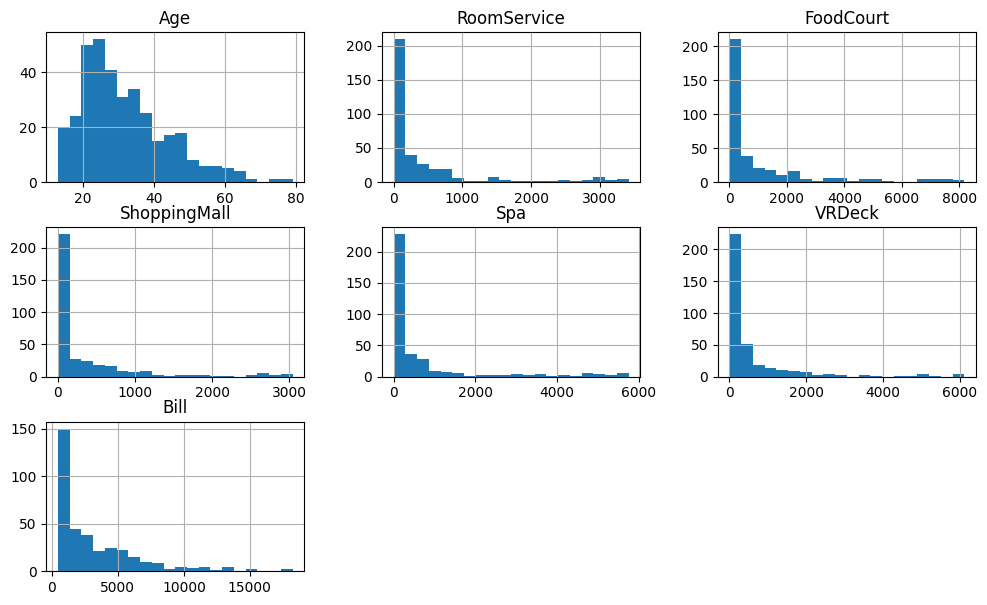

In [51]:
# Features before log transform
all_data.loc[(all_data["RoomService"]!=0)&(all_data["FoodCourt"]!=0)&(all_data["ShoppingMall"]!=0)&(all_data["Spa"]!=0)&(all_data["VRDeck"]!=0)][trcols].hist(bins=20, figsize=(12,7))

array([[<Axes: title={'center': 'log_Age'}>,
        <Axes: title={'center': 'log_RoomService'}>,
        <Axes: title={'center': 'log_FoodCourt'}>],
       [<Axes: title={'center': 'log_ShoppingMall'}>,
        <Axes: title={'center': 'log_Spa'}>,
        <Axes: title={'center': 'log_VRDeck'}>],
       [<Axes: title={'center': 'log_Bill'}>, <Axes: >, <Axes: >]],
      dtype=object)

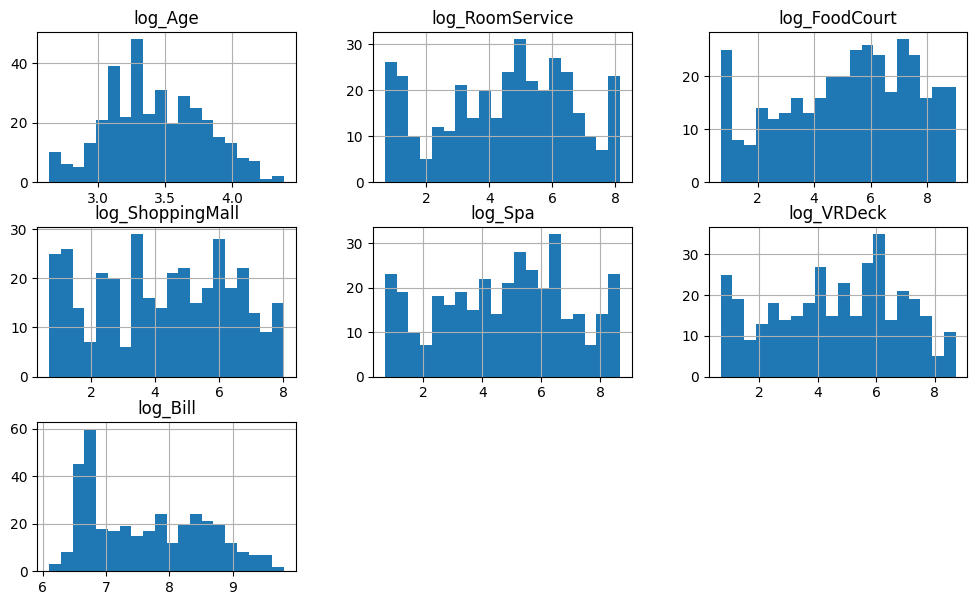

In [52]:
# Features after log transform
log_tfmd.loc[(log_tfmd["log_RoomService"]!=0)&(log_tfmd["log_FoodCourt"]!=0)&(log_tfmd["log_ShoppingMall"]!=0)&(log_tfmd["log_Spa"]!=0)&(log_tfmd["log_VRDeck"]!=0)].hist(bins=20, figsize=(12,7))

In [53]:
# One-hot/label encoding categorical variables

#oh_fam = pd.get_dummies(all_data["Family_size"], prefix="Family_size", dtype=int)
#oh_grp = pd.get_dummies(all_data["Group_Size"], prefix="Group_Size", dtype=int)
oh_cols = ['HomePlanet','Destination','Deck','Bill_group','Age_group',]#'Num_group']#,'Side',]
all_data_oh = pd.get_dummies(all_data[oh_cols], dtype=int)

le = LabelEncoder()
#all_data["Group_Id"] = le.fit_transform(all_data["Group_Id"])
#all_data["Family_size"] = le.fit_transform(all_data["Family_size"])
all_data["Group_Size"] = le.fit_transform(all_data["Group_Size"])
all_data["Alone"] = le.fit_transform(all_data["Alone"])
all_data["VIP"] = le.fit_transform(all_data["VIP"])
all_data["CryoSleep"] = le.fit_transform(all_data["CryoSleep"])
all_data["RS_ind"] = le.fit_transform(all_data["RS_ind"])
all_data["FC_ind"] = le.fit_transform(all_data["FC_ind"])
all_data["SM_ind"] = le.fit_transform(all_data["SM_ind"])
all_data["SP_ind"] = le.fit_transform(all_data["SP_ind"])
all_data["VR_ind"] = le.fit_transform(all_data["VR_ind"])

concat_list = [
               all_data["PassengerId"],
               all_data["Group_Size"], #all_data["Family_size"],
               all_data["Alone"], all_data["CryoSleep"],all_data["VIP"], #all_data["Group_Id"],  
               all_data["RS_ind"],all_data["FC_ind"],all_data["SM_ind"],all_data["SP_ind"],all_data["VR_ind"],
               all_data_oh,# oh_fam, oh_grp,
               #all_data["Age_weight"], all_data["Deck_weight"], 
               log_tfmd, all_data["Deck_perc"], all_data["Potencial_1"],all_data["Potencial_2"], 
              ]

# Fuse them back together
final_data = pd.concat(concat_list, axis=1)
final_data.head()

PassengerId  Group_Size  Alone  CryoSleep  VIP  RS_ind  FC_ind  SM_ind  \
0     0001_01           0      1          0    0       0       0       0   
1     0002_01           0      1          1    0       1       1       1   
2     0003_01           1      0          1    1       1       1       0   
3     0003_02           1      0          1    0       0       1       1   
4     0004_01           0      1          1    0       1       1       1   

   SP_ind  VR_ind  ...   log_Age  log_RoomService  log_FoodCourt  \
0       0       0  ...  3.688879         0.000000       0.000000   
1       1       1  ...  3.218876         4.700480       2.302585   
2       1       1  ...  4.077537         3.784190       8.182280   
3       1       1  ...  3.526361         0.000000       7.157735   
4       1       1  ...  2.833213         5.717028       4.262680   

   log_ShoppingMall   log_Spa  log_VRDeck  log_Bill  Deck_perc  Potencial_1  \
0          0.000000  0.000000    0.000000  0.000000   0.734275     0.984275   
1          3.258097  6.309918    3.806662  6.602588   0.439871     0.539871   
2          0.000000  8.492080    3.912023  9.052985   0.496094     0.746094   
3          5.918894  8.110728    5.267858  8.551981   0.496094     0.746094   
4          5.023881  6.338594    1.098612  6.995766   0.439871     0.939871   

   Potencial_2  
0         0.50  
1         0.10  
2         0.25  
3         0.25  
4         0.50  

[5 rows x 49 columns]

In [54]:
# I made some test and it looked like dropping these cols gives a little higher accuracy
# Is it fair to do this?!
final_data.drop(columns=["Deck_T","Deck_Z"], axis=1, inplace=True)
final_data.drop(columns=["Bill_group_2","Bill_group_3","Bill_group_4"], axis=1, inplace=True)

In [55]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                12970 non-null  object 
 1   Group_Size                 12970 non-null  int64  
 2   Alone                      12970 non-null  int64  
 3   CryoSleep                  12970 non-null  int64  
 4   VIP                        12970 non-null  int64  
 5   RS_ind                     12970 non-null  int64  
 6   FC_ind                     12970 non-null  int64  
 7   SM_ind                     12970 non-null  int64  
 8   SP_ind                     12970 non-null  int64  
 9   VR_ind                     12970 non-null  int64  
 10  HomePlanet_Earth           12970 non-null  int64  
 11  HomePlanet_Europa          12970 non-null  int64  
 12  HomePlanet_Mars            12970 non-null  int64  
 13  Destination_55 Cancri e    12970 non-null  int

In [56]:
# Now lets divide the dataset to have back the training and test 
final_train = final_data[final_data["PassengerId"].isin(train_data["PassengerId"].values)].copy()
final_test = final_data[final_data["PassengerId"].isin(test_data["PassengerId"].values)].copy()

final_train["Transported"] = target_col # we just put it back, the index must match
final_t_pid = final_test["PassengerId"] # We need them for submission
final_test.drop(columns=["PassengerId"], axis=1, inplace=True)
final_train.drop(columns=["PassengerId"], axis=1, inplace=True)

print(len(final_train), len(final_test))

8693 4277


# Correlation Heatmap & Mutual Information

To identify the importance for each of the features, mutual information and correlation matrix can provide some insight.

<Axes: >

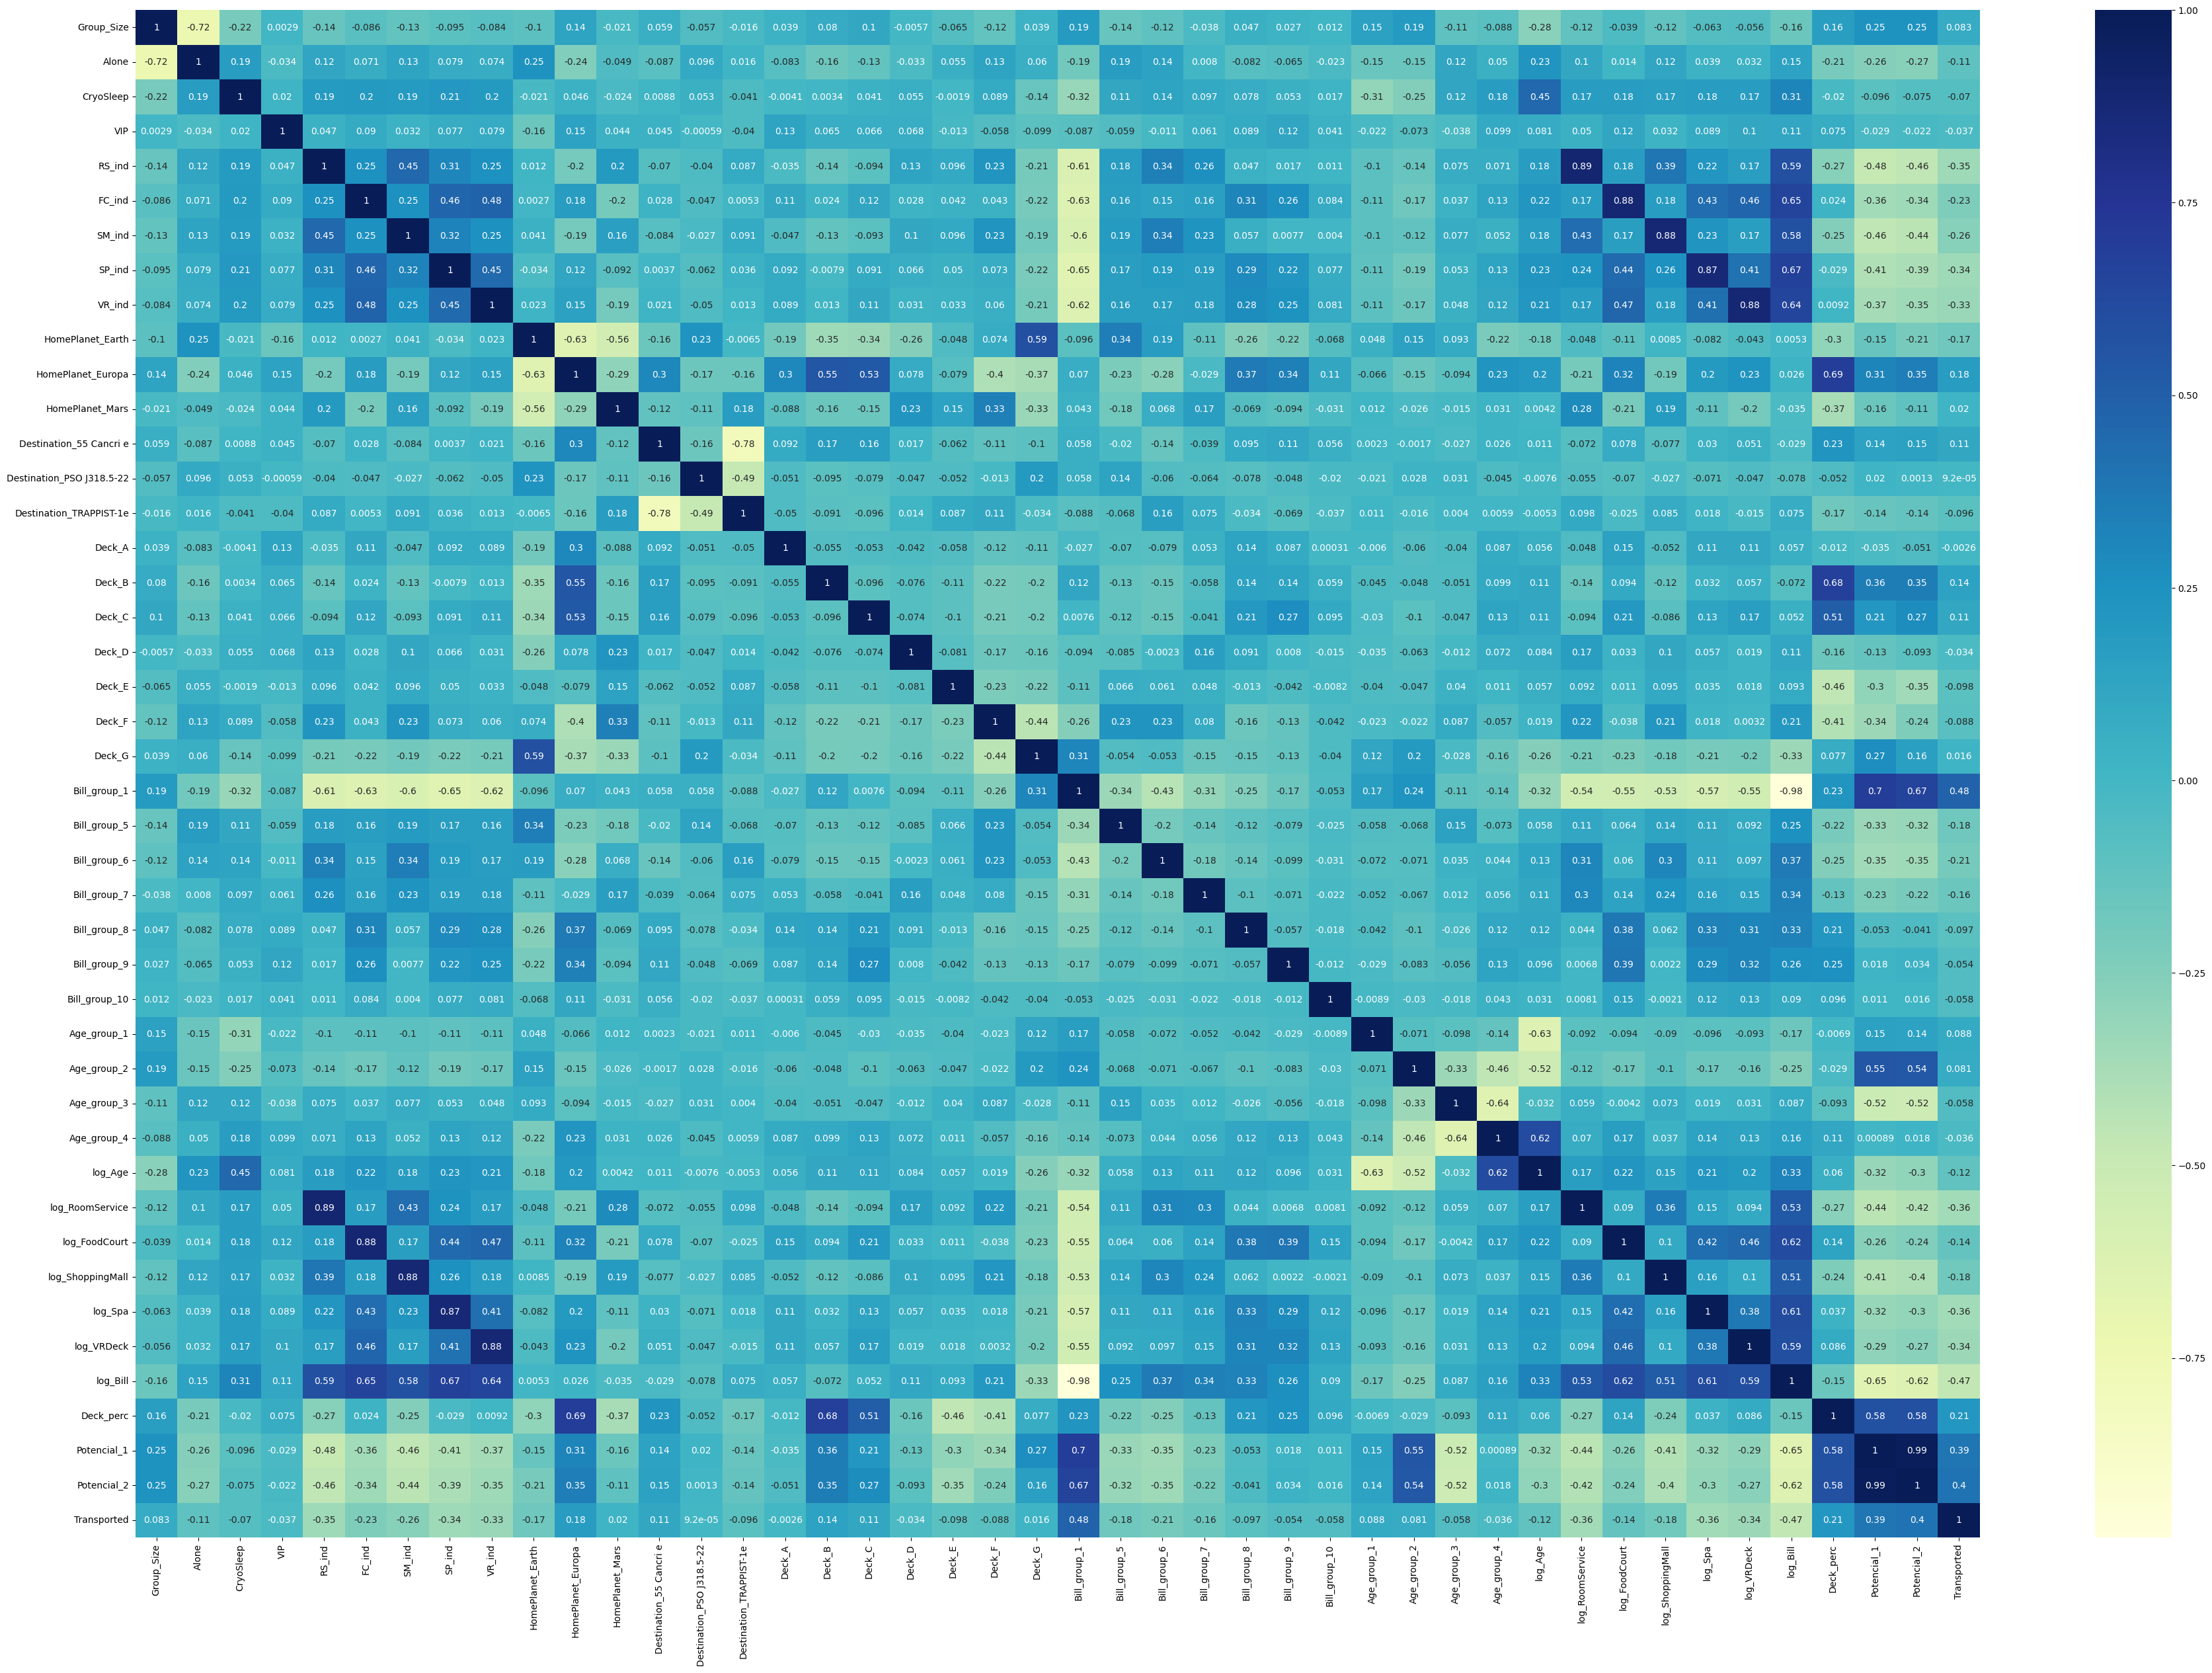

In [57]:
# Plot correlation coefficients of features
fig, ax = plt.subplots(figsize=(45,30))
fig = sns.heatmap(final_train.corr(), cmap="YlGnBu", annot=True, ax=ax)
fig

In [58]:
# Mutual Information
# from: https://www.kaggle.com/code/ryanholbrook/mutual-information
from sklearn.feature_selection import mutual_info_classif

X = final_train.copy()
y = X.pop("Transported")

# Mutual information
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

discrete_features = X.dtypes == int
mi_scores = make_mi_scores(X, y, discrete_features)

# show a few features with their MI scores
print("More realtion to target:\n",mi_scores[:10],"\n\nLess relation to target:\n",mi_scores[-10:])

More realtion to target:
 Potencial_1        0.139807
log_Bill           0.127419
Bill_group_1       0.121718
Potencial_2        0.111719
log_Spa            0.076475
log_RoomService    0.065881
RS_ind             0.062418
SP_ind             0.060772
log_VRDeck         0.058611
VR_ind             0.056663
Name: MI Scores, dtype: float64 

Less relation to target:
 Bill_group_10                2.148227e-03
Age_group_3                  1.664025e-03
Bill_group_9                 1.475953e-03
VIP                          7.002228e-04
Age_group_4                  6.353188e-04
Deck_D                       5.810241e-04
HomePlanet_Mars              1.910404e-04
Deck_G                       1.323577e-04
Deck_A                       3.440830e-06
Destination_PSO J318.5-22    4.252760e-09
Name: MI Scores, dtype: float64


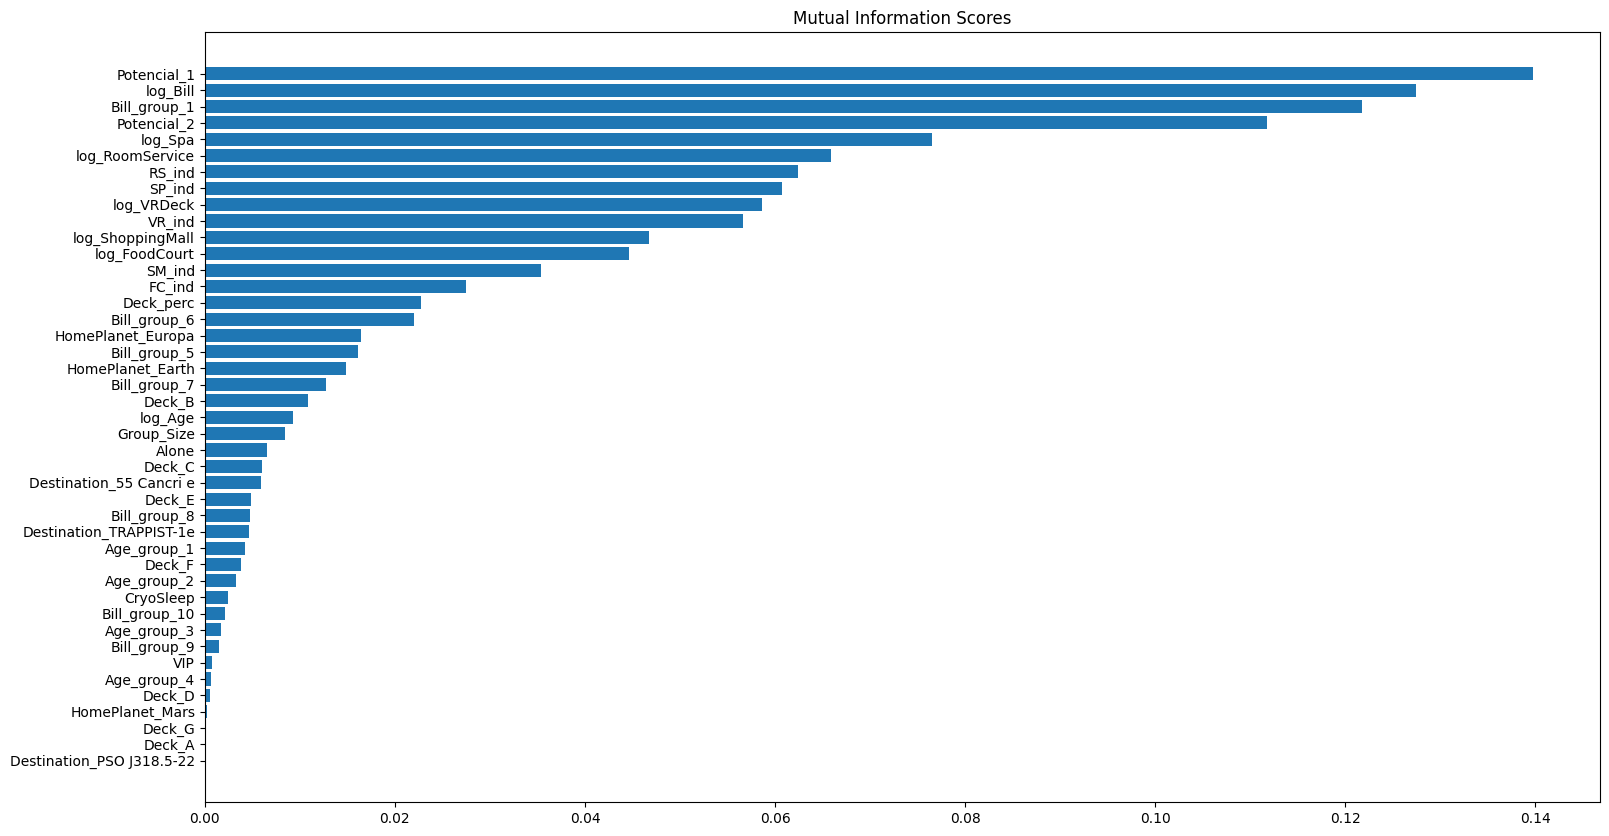

In [59]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(18, 10))
plot_mi_scores(mi_scores)

Based on the mutual information, we can see that most of the Num_group, Age_group classes have small MI score, so they might be less relevant in the classification. While features like Potencial_1-2, Deck_perc, and all of the "service" features have higher MI score.  

# Modelling

In [60]:
# Shuffle data (there are many family member coming after each other)
data_shuffled = shuffle(final_train, random_state=123)

# Target separation
X = data_shuffled.drop("Transported", axis=1)
y = data_shuffled["Transported"]

# Splitting for training/validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=123)
print(len(X_train), len(X_valid))

6954 1739


### Logistic Regression

Logistic regression accuracy: 0.7797584818861415


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


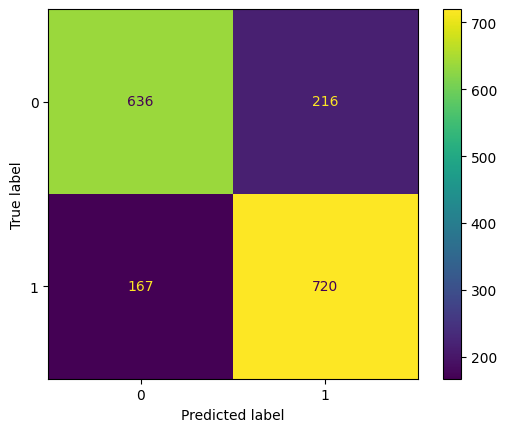

In [61]:
logr = LogisticRegression(max_iter=200, random_state=123)
logr.fit(X_train, y_train)
logr_prediction = logr.predict(X_valid)
logr_test_pred = logr.predict(final_test)

logr_score = accuracy_score(y_valid, logr_prediction)
print(f"Logistic regression accuracy: {logr_score}")

logr_cm = confusion_matrix(y_true=y_valid, y_pred=logr_prediction)
show_logrcm = ConfusionMatrixDisplay(confusion_matrix=logr_cm)
show_logrcm.plot()

### Decesion Tree

Decision tree accuracy: 0.8027602070155262


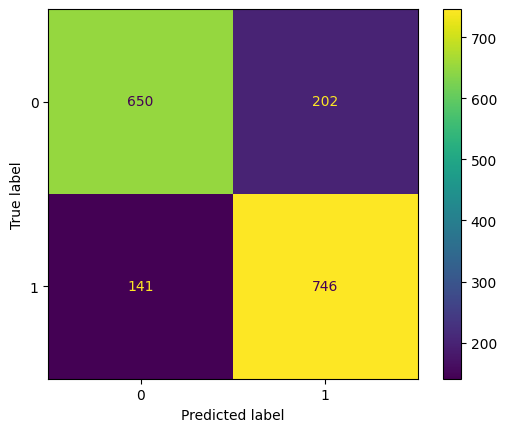

In [62]:
dt = DecisionTreeClassifier(max_depth=7, random_state=123)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_valid)
dt_test_pred = dt.predict(final_test)

dt_score = accuracy_score(y_valid, dt_prediction)
print(f"Decision tree accuracy: {dt_score}")

dt_cm = confusion_matrix(y_true=y_valid, y_pred=dt_prediction)
show_dtcm = ConfusionMatrixDisplay(confusion_matrix=dt_cm)
show_dtcm.plot()

### Random Forest

Random forest accuracy: 0.8010350776308223


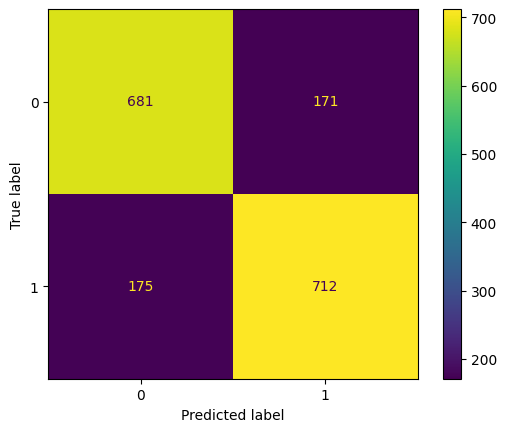

In [63]:
rf = RandomForestClassifier(n_estimators=100, max_depth=11, random_state=123)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_valid)
rf_test_pred = rf.predict(final_test)

rf_score = accuracy_score(y_valid, rf_prediction)
print(f"Random forest accuracy: {rf_score}")

rf_cm = confusion_matrix(y_true=y_valid, y_pred=rf_prediction)
show_rfcm = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
show_rfcm.plot()

### XGBoost

XGBoost accuracy: 0.8102357676825762


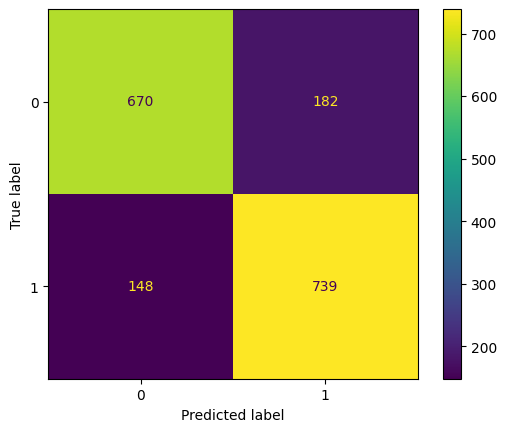

In [64]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=220, max_depth=8, learning_rate=0.01, objective="binary:logistic", random_state=123)
#xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=123)
xgb_model.fit(X_train, y_train)
xgb_prediction = xgb_model.predict(X_valid)
xgb_test_pred = xgb_model.predict(final_test)

xgb_score = accuracy_score(y_valid, xgb_prediction)
print(f"XGBoost accuracy: {xgb_score}")

xgb_cm = confusion_matrix(y_true=y_valid, y_pred=xgb_prediction)
show_xgbcm = ConfusionMatrixDisplay(confusion_matrix=xgb_cm)
show_xgbcm.plot()

### Support Vector Machine

SVM accuracy: 0.7964347326049454


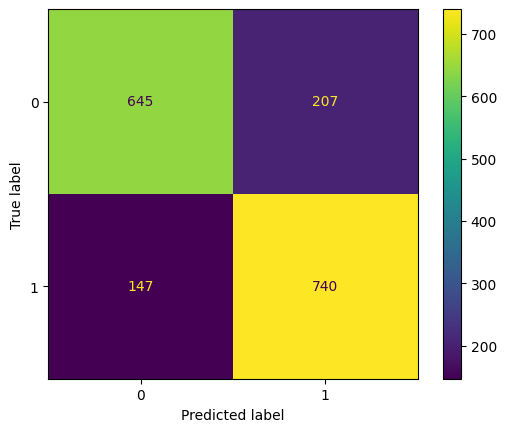

In [65]:
svm = SVC(gamma='auto', random_state=123)
svm.fit(X_train, y_train)
svm_prediction = svm.predict(X_valid)
svm_test_pred = svm.predict(final_test)

svm_score = accuracy_score(y_valid, svm_prediction)
print(f"SVM accuracy: {svm_score}")

svm_cm = confusion_matrix(y_true=y_valid, y_pred=svm_prediction)
show_svmcm = ConfusionMatrixDisplay(confusion_matrix=svm_cm)
show_svmcm.plot()

### Neural Network

In [66]:
import tensorflow as tf
tf.random.set_seed(123)

EPS = 100
BS = 128
L_RATE = 5e-3
INPUT_SHAPE = (43,)
WEIGHT_DECAY = 0.001

nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=INPUT_SHAPE),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

nn_model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=L_RATE, weight_decay=WEIGHT_DECAY),   
    metrics = ['accuracy'],
)

LR = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=1)
ES = tf.keras.callbacks.EarlyStopping(patience=2)
MC = tf.keras.callbacks.ModelCheckpoint("./best_nn_model.h5", save_best_only=True)

nn_history = nn_model.fit(
    X_train,
    y_train,
    epochs=EPS,
    batch_size=BS,
    validation_data=(X_valid, y_valid),
    callbacks=[LR,ES,MC],
)

Epoch 1/100
55/55 [==============================] - 2s 9ms/step - loss: 0.5253 - accuracy: 0.7535 - val_loss: 0.4571 - val_accuracy: 0.7838 - lr: 0.0050
Epoch 2/100
43/55 [======================>.......] - ETA: 0s - loss: 0.4522 - accuracy: 0.7863

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


55/55 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.7856 - val_loss: 0.4495 - val_accuracy: 0.7872 - lr: 0.0050
Epoch 3/100
55/55 [==============================] - 0s 4ms/step - loss: 0.4398 - accuracy: 0.7886 - val_loss: 0.4491 - val_accuracy: 0.7936 - lr: 0.0050
Epoch 4/100
55/55 [==============================] - 0s 4ms/step - loss: 0.4326 - accuracy: 0.7922 - val_loss: 0.4337 - val_accuracy: 0.8028 - lr: 0.0050
Epoch 5/100
55/55 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.7893 - val_loss: 0.4368 - val_accuracy: 0.7953 - lr: 0.0050
Epoch 6/100
55/55 [==============================] - 0s 4ms/step - loss: 0.4181 - accuracy: 0.7982 - val_loss: 0.4277 - val_accuracy: 0.7953 - lr: 5.0000e-04
Epoch 7/100
55/55 [==============================] - 0s 4ms/step - loss: 0.4147 - accuracy: 0.8010 - val_loss: 0.4266 - val_accuracy: 0.7976 - lr: 5.0000e-04
Epoch 8/100
55/55 [==============================] - 0s 4ms/step - loss: 0.4133 

<Axes: >

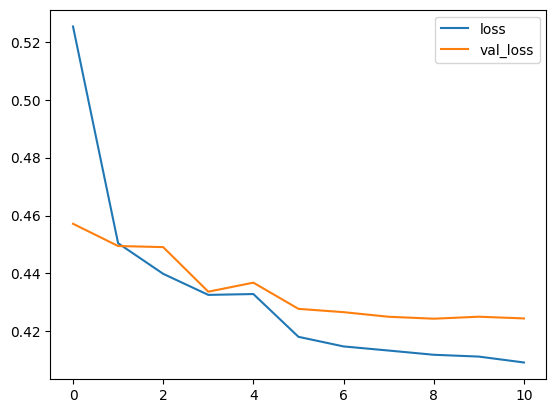

In [67]:
pd.DataFrame(nn_history.history)[["loss","val_loss"]].plot()

<Axes: >

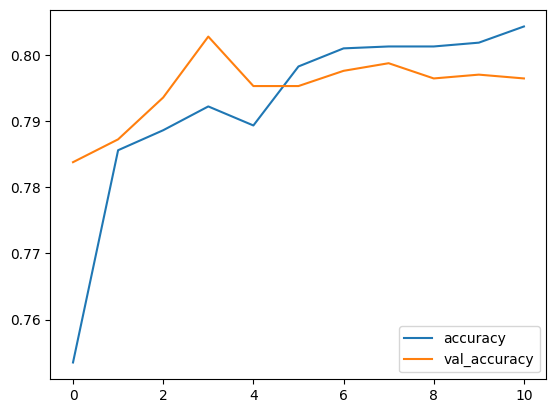

In [68]:
pd.DataFrame(nn_history.history)[["accuracy","val_accuracy"]].plot()

55/55 [==============================] - 0s 2ms/step
NN accuracy: 0.7964347326049454


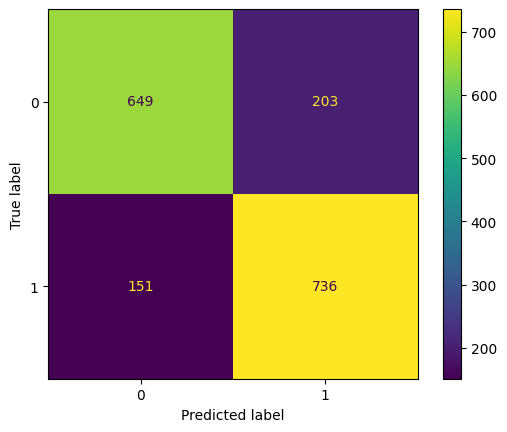

In [69]:
nn_prediction = tf.round(nn_model.predict(X_valid))
nn_score = accuracy_score(y_valid, nn_prediction)
print(f"NN accuracy: {nn_score}")

nn_cm = confusion_matrix(y_true=y_valid, y_pred=nn_prediction)
show_nncm = ConfusionMatrixDisplay(confusion_matrix=nn_cm)
show_nncm.plot()

### Ensemble Model

In [70]:
class CustomError(Exception):
    "Train the classifier before making predictions. "
    pass

class EnsembleModel:
    """ Ensemble model. The voting logic works well with odd numbers of models.
        e.g.: If there are 3 models, we accept the output by 2/3 vote. """

    def __init__(self, verbose=True):
        #self.logr = LogisticRegression(max_iter=200, random_state=123) # comment out the worst performing model
        self.dt = DecisionTreeClassifier(max_depth=10, random_state=123)
        self.rf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=123)
        self.xgb = xgb.XGBClassifier(n_estimators=300, max_depth=3, learning_rate=0.1, objective="binary:logistic", random_state=123)
        self.svm = SVC(gamma='auto', random_state=123)
        self.nn = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation="relu", input_shape=INPUT_SHAPE),
            tf.keras.layers.Dense(16, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid")
        ])
        self.nn.compile(loss='binary_crossentropy',
                        optimizer=tf.keras.optimizers.Adam(learning_rate=L_RATE, weight_decay=WEIGHT_DECAY),
                        metrics=['accuracy'])
        self.trained = False
        self.verbose = verbose
        
    def fit(self, X, y, X_v, y_v):
        if self.verbose:
            print('---- Fitting models -----')

        self.nn.fit(X, y, 
                    epochs=EPS, batch_size=BS, 
                    validation_data=(X_v,y_v),
                    callbacks=[ES,LR], verbose=0)
        #self.logr.fit(X, y)
        self.dt.fit(X, y)
        self.rf.fit(X, y)
        self.xgb.fit(X, y)
        self.svm.fit(X, y)
        self.trained = True

    def predict(self, X):
        if self.trained == False:
            raise CustomError
        if self.verbose:
            print('------ Making and combining predictions ------')
        predictions = []
        pred_nn = tf.round(self.nn.predict(X))
        #pred_logr = self.logr.predict(X)
        pred_dt = self.dt.predict(X)
        pred_rf = self.rf.predict(X)
        pred_xgb = self.xgb.predict(X)
        pred_svm = self.svm.predict(X)

        for n in range(len(pred_nn)):
            combined = [int(pred_nn[n]), pred_dt[n], pred_xgb[n], pred_rf[n], pred_svm[n]]
            p = 1 if combined.count(1) >= 3 else 0
            predictions.append(p)

        return predictions

---- Fitting models -----
------ Making and combining predictions ------
55/55 [==============================] - 0s 1ms/step
------ Making and combining predictions ------
134/134 [==============================] - 0s 1ms/step
Ensemble model accuracy: 0.8096607245543416


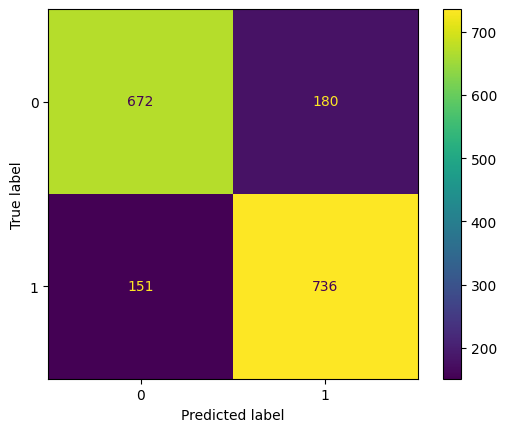

In [71]:
ens = EnsembleModel()
ens.fit(X=X_train, y=y_train, X_v=X_valid, y_v=y_valid)
ens_pred = ens.predict(X_valid)
ens_test_pred = ens.predict(final_test)

ens_score = accuracy_score(y_valid, ens_pred)
print(f"Ensemble model accuracy: {ens_score}")

ens_cm = confusion_matrix(y_true=y_valid, y_pred=ens_pred)
show_enscm = ConfusionMatrixDisplay(confusion_matrix=ens_cm)
show_enscm.plot()

In [72]:
print("Finally all model's accuracy:")
print(f"""
LG: {logr_score*100:.2f}%
DT: {dt_score*100:.2f}%
RF: {rf_score*100:.2f}%
XGB: {xgb_score*100:.2f}%
SVM: {svm_score*100:.2f}%
NN: {nn_score*100:.2f}%
ENS: {ens_score*100:.2f}%
""")

Finally all model's accuracy:

LG: 77.98%
DT: 80.28%
RF: 80.10%
XGB: 81.02%
SVM: 79.64%
NN: 79.64%
ENS: 80.97%



### Test set predictions

In [73]:
# Load in best NN model
model_saved = "/kaggle/working/best_nn_model.h5"
loaded_model = tf.keras.models.load_model(model_saved)

# Predictions on test
nn_test_pred = tf.round(loaded_model.predict(final_test))

134/134 [==============================] - 0s 1ms/step


In [74]:
final_test["LG_preds"] = logr_test_pred
final_test["DT_preds"] = dt_test_pred
final_test["RF_preds"] = rf_test_pred
final_test["XGB_preds"] = xgb_test_pred
final_test["SVM_preds"] = svm_test_pred
final_test["NN_preds"] = nn_test_pred
final_test["ENS_preds"] = ens_test_pred

In [75]:
# Class prediction ratios
print(final_test.LG_preds.value_counts(),"\n")
print(final_test.DT_preds.value_counts(),"\n")
print(final_test.RF_preds.value_counts(),"\n")
print(final_test.XGB_preds.value_counts(),"\n")
print(final_test.SVM_preds.value_counts(),"\n")
print(final_test.NN_preds.value_counts(),"\n")
print(final_test.ENS_preds.value_counts(),"\n")

LG_preds
True     2289
False    1988
Name: count, dtype: int64 

DT_preds
True     2320
False    1957
Name: count, dtype: int64 

RF_preds
True     2206
False    2071
Name: count, dtype: int64 

XGB_preds
1    2266
0    2011
Name: count, dtype: int64 

SVM_preds
True     2355
False    1922
Name: count, dtype: int64 

NN_preds
1.0    2253
0.0    2024
Name: count, dtype: int64 

ENS_preds
1    2265
0    2012
Name: count, dtype: int64 



### Submission

In [76]:
submission = pd.concat([final_t_pid, final_test["XGB_preds"].astype('bool')], axis=1).rename(columns={"XGB_preds":"Transported"})
submission

PassengerId  Transported
8693      0013_01         True
8694      0018_01        False
8695      0019_01         True
8696      0021_01         True
8697      0023_01         True
...           ...          ...
12965     9266_02         True
12966     9269_01        False
12967     9271_01         True
12968     9273_01         True
12969     9277_01        False

[4277 rows x 2 columns]

In [77]:
submission.to_csv("submission.csv", index=False)